In [97]:
import os
import random
import csv
from deepface import DeepFace
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
def extract_info_from_filename(filename):
    try:
        age, gender, race, _ = filename.split('_')
        return int(age), int(gender), int(race)
    except Exception as e:
        print(f"Error extracting info from filename {filename}: {e}")
        return None, None, None

In [99]:
def analyze_image(filepath):
    try:
        results = DeepFace.analyze(filepath, actions=['age', 'gender', 'race'])
        if results and isinstance(results, list):
            analysis = results[0]
            predicted_age = analysis['age']
            predicted_gender = 1 if analysis['dominant_gender'] == 'Woman' else 0
            dominant_race = analysis['dominant_race']
            return predicted_age, predicted_gender, dominant_race
        else:
            print(f"No valid analysis results for {filepath}")
            return None, None, None
    except Exception as e:
        print(f"Analysis failed for {filepath}: {e}")
        return None, None, None


In [100]:

def select_random_files(directory, num_files):
    jpg_files = [file for file in os.listdir(directory) if file.endswith('.jpg')]
    return random.sample(jpg_files, min(num_files, len(jpg_files)))

In [101]:
# Directory containing images
directory = "E:/capJC/paper/part1"

In [102]:
# Select 10 random files for initial analysis
random_files = select_random_files(directory, 10)

In [103]:
# Open text files for writing errors and unprocessed files
error_file = open('error_files.txt', 'w')


In [104]:
# Lists to store data
actual_data = []
predicted_data = []

In [105]:


# Analyze 10 random images first (to ensure the proper working of the defined objects)
for filename in random_files:
    filepath = os.path.join(directory, filename)
    actual_age, actual_gender, actual_race = extract_info_from_filename(filename)

    if actual_age is None or actual_gender is None or actual_race is None:
        print(f"Skipping {filename} due to error in extracting actual data.")
        error_file.write(filename + '\n')
        continue

    predicted_age, predicted_gender, predicted_race = analyze_image(filepath)

    if predicted_age is not None and predicted_gender is not None and predicted_race is not None:
        actual_data.append([filename, actual_age, actual_gender, actual_race])
        predicted_data.append([filename, predicted_age, predicted_gender, predicted_race])

Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\78_0_0_20170120140748041.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


In [106]:
print("Analyzed data for 10 random images:")
for data in predicted_data:
    print(data)

Analyzed data for 10 random images:
['28_1_1_20170112222231219.jpg', 26, 0, 'white']
['1_1_2_20161219161741126.jpg', 16, 0, 'asian']
['40_1_0_20170105172808981.jpg', 41, 0, 'white']
['16_0_0_20170117134536197.jpg', 25, 0, 'white']
['30_0_3_20170119204757926.jpg', 32, 0, 'asian']
['26_0_2_20170116181343246.jpg', 30, 0, 'middle eastern']
['56_1_0_20170103162933143.jpg', 46, 1, 'white']
['24_0_0_20170117150217643.jpg', 39, 0, 'white']
['39_0_0_20170109133418712.jpg', 23, 0, 'white']


In [107]:
# Analyzng the rest of the images
for filename in os.listdir(directory):
    if filename.endswith('.jpg') and filename not in random_files:
        filepath = os.path.join(directory, filename)
        actual_age, actual_gender, actual_race = extract_info_from_filename(filename)

        if actual_age is None or actual_gender is None or actual_race is None:
            print(f"Skipping {filename} due to error in extracting actual data.")
            error_file.write(filename + '\n')
            continue

        predicted_age, predicted_gender, predicted_race = analyze_image(filepath)

        if predicted_age is not None and predicted_gender is not None and predicted_race is not None:
            actual_data.append([filename, actual_age, actual_gender, actual_race])
            predicted_data.append([filename, predicted_age, predicted_gender, predicted_race])

Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\101_0_0_20170112213500903.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\103_0_2_20170112213001988.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\105_1_0_20170112213001988.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\105_1_0_20170112213021902.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\105_1_1_20170112213303693.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\10_0_0_20170110215927291.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\10_0_0_20170110220111082.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\10_0_0_20170110220251986.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\10_0_0_20170110220255346.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\10_0_0_20170110220316298.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\10_0_0_20170110220530650.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\10_0_0_20170110220539329.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\10_0_0_20170110220541850.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\10_0_0_20170110220644705.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\10_0_0_20170110221811823.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]  


Analysis failed for E:/capJC/paper/part1\10_0_0_20170110224238891.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\10_0_0_20170110224549512.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]  


Analysis failed for E:/capJC/paper/part1\10_0_0_20170110225505288.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\10_0_0_20170117135444407.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]  


Analysis failed for E:/capJC/paper/part1\10_0_1_20170110225121326.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\10_1_0_20170109201728056.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\10_1_0_20170109203218966.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\10_1_0_20170109203917216.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\10_1_0_20170110220649364.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\10_1_1_20170109203522559.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\10_1_2_20170104022216669.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]  


Analysis failed for E:/capJC/paper/part1\10_1_3_20170119150820222.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\110_0_2_20170112223734562.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\110_1_1_20170110155117522.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\110_1_1_20170110155201038.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\110_1_3_20170110155139762.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\11_0_0_20170110220500946.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\11_0_0_20170110220518578.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\11_0_0_20170110224408700.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\11_0_0_20170110225254975.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\11_1_0_20170109205122664.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\11_1_4_20170103212554964.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]  


Analysis failed for E:/capJC/paper/part1\12_0_0_20170109213205384.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\12_0_0_20170110215606404.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\12_0_0_20170110224843637.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\12_0_0_20170110225049785.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]  


Analysis failed for E:/capJC/paper/part1\12_0_0_20170110232735095.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\12_0_0_20170117133903517.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\12_0_1_20170110225335956.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\12_0_2_20161219212833549.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\12_1_0_20170109203424756.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\12_1_0_20170109204805155.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\12_1_0_20170109213205384.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\12_1_0_20170117154622148.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]  


Analysis failed for E:/capJC/paper/part1\12_1_1_20170109204809866.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\12_1_1_20170116225216163.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\12_1_2_20170116194059753.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\13_0_0_20170103201032542.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\13_0_0_20170110224328242.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\13_0_0_20170110224337867.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]  


Analysis failed for E:/capJC/paper/part1\13_0_0_20170110232519225.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]  


Analysis failed for E:/capJC/paper/part1\13_0_2_20170103201417686.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]  


Analysis failed for E:/capJC/paper/part1\13_0_4_20170103201708406.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\13_1_0_20170104005742384.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]  


Analysis failed for E:/capJC/paper/part1\13_1_0_20170109204055232.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]  


Analysis failed for E:/capJC/paper/part1\13_1_0_20170109213526011.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]  


Analysis failed for E:/capJC/paper/part1\14_0_0_20170110220704398.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]  


Analysis failed for E:/capJC/paper/part1\14_0_0_20170110223437445.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\14_0_0_20170110224441502.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]  


Analysis failed for E:/capJC/paper/part1\14_0_0_20170110225056665.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]  


Analysis failed for E:/capJC/paper/part1\14_0_0_20170110225130741.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\14_0_0_20170110232124117.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]  


Analysis failed for E:/capJC/paper/part1\14_0_0_20170116204045849.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]  


Analysis failed for E:/capJC/paper/part1\14_0_3_20170104225858160.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]  


Analysis failed for E:/capJC/paper/part1\14_0_4_20170103201644927.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]  


Analysis failed for E:/capJC/paper/part1\14_1_0_20170103183504594.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\14_1_0_20170109204158115.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]  


Analysis failed for E:/capJC/paper/part1\14_1_0_20170109204304326.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\14_1_0_20170109204620092.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\14_1_0_20170109213221821.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\14_1_0_20170109213541777.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]  


Analysis failed for E:/capJC/paper/part1\14_1_0_20170109214406209.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\14_1_0_20170109214714069.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\14_1_1_20170109214208957.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\14_1_3_20161220220655004.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]  


Analysis failed for E:/capJC/paper/part1\15_0_0_20170110224250144.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\15_0_0_20170110224324459.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\15_0_0_20170110225622776.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\15_0_0_20170110225705232.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\15_0_0_20170110232306381.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]  


Analysis failed for E:/capJC/paper/part1\15_0_0_20170110232331351.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\15_0_0_20170110232338801.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\15_0_0_20170110232452356.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\15_0_0_20170110232636744.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]  


Analysis failed for E:/capJC/paper/part1\15_0_0_20170110232807958.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\15_0_1_20170110231743136.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]  


Analysis failed for E:/capJC/paper/part1\15_0_1_20170117135556256.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]  


Analysis failed for E:/capJC/paper/part1\15_0_2_20161219193832243.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]  


Analysis failed for E:/capJC/paper/part1\15_1_0_20170109203414090.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]  


Analysis failed for E:/capJC/paper/part1\15_1_0_20170109204210842.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\15_1_0_20170109204354264.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\15_1_0_20170109213448729.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\15_1_0_20170109214302271.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\15_1_0_20170109214447621.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\15_1_1_20170112191307797.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\15_1_2_20161219193333691.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\15_1_3_20170117142502538.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]  


Analysis failed for E:/capJC/paper/part1\16_0_0_20170110231218369.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\16_0_0_20170110231700274.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\16_0_0_20170110231720674.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\16_0_0_20170110231725022.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\16_0_0_20170110231758466.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\16_0_0_20170110231759619.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\16_0_0_20170110231800697.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\16_0_0_20170110231811882.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]  


Analysis failed for E:/capJC/paper/part1\16_0_0_20170110231916206.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]  


Analysis failed for E:/capJC/paper/part1\16_0_0_20170110231918043.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]  


Analysis failed for E:/capJC/paper/part1\16_0_0_20170110231919941.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\16_0_0_20170110232040957.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\16_0_0_20170110232313053.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\16_0_0_20170110232315216.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\16_0_0_20170110232316211.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\16_0_0_20170110232332618.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]  


Analysis failed for E:/capJC/paper/part1\16_0_0_20170110232432328.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]  


Analysis failed for E:/capJC/paper/part1\16_0_0_20170110232445820.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\16_0_0_20170110232451479.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]  


Analysis failed for E:/capJC/paper/part1\16_0_0_20170110232613101.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\16_0_0_20170110232641966.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\16_0_0_20170110232742700.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\16_0_0_20170110232818695.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\16_0_0_20170116201208865.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]  


Analysis failed for E:/capJC/paper/part1\16_0_1_20170110232035513.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\16_0_1_20170113152759697.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\16_0_1_20170113155247627.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\16_1_0_20170105000703117.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\16_1_0_20170109213604149.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\16_1_0_20170109213948727.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\16_1_0_20170109213954271.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\16_1_0_20170109214013596.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\16_1_0_20170109214333355.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\16_1_0_20170109214415828.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\16_1_0_20170109214419099.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\16_1_0_20170109214757287.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\16_1_0_20170113210605072.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\16_1_0_20170116000649066.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\16_1_1_20170112191148791.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\16_1_1_20170114025506835.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\16_1_1_20170114025520014.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\16_1_2_20170109214552372.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\16_1_3_20170104222208647.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\17_0_0_20170104230556561.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\17_0_0_20170110231210547.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]  


Analysis failed for E:/capJC/paper/part1\17_0_0_20170110232022621.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]  


Analysis failed for E:/capJC/paper/part1\17_0_0_20170116205532920.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\17_0_0_20170116205554725.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\17_0_1_20170114025845366.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\17_0_1_20170116182122450.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\17_0_4_20170103212532692.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]  


Analysis failed for E:/capJC/paper/part1\17_1_0_20170109205309078.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]  


Analysis failed for E:/capJC/paper/part1\17_1_0_20170116222802508.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\17_1_1_20170112230710598.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\17_1_1_20170112234115471.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\17_1_1_20170114030019967.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\17_1_1_20170117134939470.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\17_1_2_20170104020251980.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\17_1_3_20170104221840229.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]  


Analysis failed for E:/capJC/paper/part1\17_1_3_20170119153627673.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\17_1_4_20170102234911226.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\17_1_4_20170103222931966.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\17_1_4_20170103234135204.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\18_0_0_20170110232106743.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\18_0_0_20170117140759528.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]  


Analysis failed for E:/capJC/paper/part1\18_0_1_20170113132626633.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\18_0_1_20170113132629362.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]  


Analysis failed for E:/capJC/paper/part1\18_0_1_20170113184819320.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]  


Analysis failed for E:/capJC/paper/part1\18_0_1_20170117143031666.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\18_0_2_20170116165401987.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\18_1_0_20170104022856102.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\18_1_0_20170109212538216.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\18_1_0_20170109212756182.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\18_1_0_20170109212830216.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\18_1_0_20170109212908376.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\18_1_0_20170109212914272.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\18_1_0_20170109214106546.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\18_1_0_20170109214215051.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\18_1_0_20170109214216731.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\18_1_0_20170109214239711.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\18_1_0_20170109214241069.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\18_1_0_20170109214311284.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\18_1_0_20170109214336149.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\18_1_0_20170109214749825.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]  


Analysis failed for E:/capJC/paper/part1\18_1_0_20170117140504776.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\18_1_1_20170109214355606.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\18_1_1_20170113002913732.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\18_1_1_20170113005132350.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\18_1_1_20170114030253404.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\18_1_1_20170116000609057.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\18_1_3_20170104221936503.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\18_1_3_20170109213106901.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\18_1_3_20170119153619553.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\19_0_0_20170102233250652.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\19_0_0_20170110232102606.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\19_0_1_20170113132639480.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\19_0_2_20170104020121132.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\19_1_0_20170109214615122.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\19_1_1_20170114030824961.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\19_1_2_20170104021632526.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\19_1_3_20170104221744823.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20161219140623097.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20161219140642920.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_0_20161219154018476.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20161219154724341.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20161219160659230.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20161219161028662.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_0_20161219162630727.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20161219190045155.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_0_20161219190621290.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20161219192208688.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20161219192713491.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20161219202455708.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_0_20161219203009924.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20161219205145821.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20161219212409141.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20161220201355210.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20161220223221043.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_0_20170103210032258.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170109191105641.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170109191440780.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170109191808532.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170109192819417.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170109193052283.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_0_20170109193328570.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170109193440113.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170109193647852.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_0_20170109193820009.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170109193841675.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_0_20170109193945281.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_0_20170109194042219.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_0_20170109194120301.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_0_20170109194225586.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170109194400094.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170110211517802.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170110211536519.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170110212552670.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170110212704144.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170110212720644.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170110212745529.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170110212759695.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_0_20170110212857171.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170110213042997.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170110213130200.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170110213222174.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170110213403723.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_0_20170110213412695.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170110213448015.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_0_20170110213501282.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170110213520510.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_0_20170117133107123.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_0_20170117133107124.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_1_20161219160115237.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_1_20170110213113882.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_1_20170110213645409.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_1_20170110213716266.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219140525218.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219140658208.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219140811232.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219140929864.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219141226856.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219141758721.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219141908313.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219141958386.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219142002631.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219142032650.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219142034545.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219142124569.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219142306002.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219142357561.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219142409225.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219142630087.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219151117789.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219151123435.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219151133795.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219151138155.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219151200707.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analy

Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219153107301.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219153209772.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219153300420.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219153348412.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219153457308.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219153658004.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219154354285.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219154715885.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219154727981.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219154852685.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219155400229.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219155405989.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219155701277.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219155744942.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219155802845.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219155822605.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219155850477.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219155855829.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219155859061.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219155952157.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219160450054.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219160747326.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219160951502.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219160955846.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219161032534.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219161106398.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219161614550.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219161621566.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219161625326.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219161626814.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219161822166.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219161855278.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219161919870.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219161941534.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219161948254.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219162424959.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219162429886.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219162433846.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219162544751.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219162546742.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219162618670.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219162719255.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219162726231.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219162817126.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219162847615.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219162849078.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219162850150.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219162852759.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219163559031.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analy

Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219192710259.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219194543059.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219194716652.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219194845363.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219194859803.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219195130076.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219195203931.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219195311539.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219195643627.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219195649628.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219195737467.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219195848259.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219195959395.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219200010091.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219200048084.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219200619172.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219201312292.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219201403764.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219201409620.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219201440668.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219201528716.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219202752764.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219202819916.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219203122004.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219203236876.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219203249692.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219203310132.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219203313365.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219203405020.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219203439924.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219203724580.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219203726676.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219203752612.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219203918140.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219204108580.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219204418485.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219204450317.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219204515493.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219204619652.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219204653181.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219204836612.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219204845029.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219204848341.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219204951309.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219204958037.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219205107772.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219205117501.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219205148821.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219205225773.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219205313061.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219205318388.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analy

Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219205758717.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219210310309.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219210754437.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219211357821.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219211505437.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219211726005.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219211929574.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219212555694.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219212824950.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219215433975.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219221118847.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219221751759.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219221833407.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219222014119.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219222119639.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219222722535.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161219222752047.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20161219222755031.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20161220144911423.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20170109191125532.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20170109191453449.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20170109192102236.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20170109193535757.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_2_20170110213523297.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_2_20170116194202388.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161219224423280.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161219224653256.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161219224709226.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161219224748008.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_3_20161219224843048.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_3_20161219224914784.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_3_20161219224917304.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161219224942305.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161219225012529.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_3_20161219225021361.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161219225322506.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_3_20161219225357184.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161219225559648.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161219225616560.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_3_20161219225631312.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161219225811120.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161219225846512.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161219230004880.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_3_20161219230032969.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161219230132696.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161219230525895.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161219230601296.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161219230651432.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161220142923423.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161220142927974.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161220143046087.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161220143117879.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_3_20161220143121101.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161220144949223.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_3_20161220145001239.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_3_20161220145156367.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161220145308279.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_3_20161220145416255.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161220220154425.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161220220355890.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161220220418690.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161220220606705.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161220221723490.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161220222443283.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161220222642427.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_3_20161220223014827.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_3_20161220223100579.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_4_20161221192548675.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_4_20161221192550798.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_4_20161221192601052.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_4_20161221192855037.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_4_20161221193434166.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_4_20161221195047839.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_4_20161221195109583.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_4_20161221195115664.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_4_20161221195132783.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_4_20161221195419136.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_4_20161221195425649.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_4_20161221195857728.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_4_20161221200034160.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_4_20161221201411850.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_4_20161221201527169.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_4_20161221201548713.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_4_20161221201753176.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_4_20161221202006449.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_4_20161221202127697.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_4_20161221202331737.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_4_20161221202848809.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_4_20170103202401551.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_4_20170103205312818.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\1_0_4_20170103210101969.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_0_4_20170103210247922.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20161219154808116.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20161219160037214.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20161219161130446.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20161219161646230.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20161219194707290.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20161219201324636.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20161219204130316.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20161219205534526.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20161219212106493.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20161219225855568.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109190459034.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109190516994.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109190538300.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109190543118.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109190550456.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109190710292.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109190742179.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109190810090.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109190811756.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109190841660.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109190843285.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109190845250.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109190846125.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109190852630.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109190935139.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109190957578.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109191023360.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109191142050.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109191144250.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109191225850.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109191253730.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109191345833.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109191447766.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109191529313.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109192402736.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109192442932.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109192451846.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109192737181.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109192752097.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109192755957.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109193015973.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109193018259.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109193126049.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109193148580.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109193334553.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109193447073.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109193454176.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109193455503.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109193644121.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109193704430.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analy

Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109194117865.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109194143550.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109194152308.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109194202932.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109194212472.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109194219940.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109194412700.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109194413813.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_0_20170109194432489.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109194452834.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_0_20170109194459256.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_1_20170109191243420.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_1_20170109192725012.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_1_20170109194542680.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_1_20170109194611993.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219140604000.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219141436353.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219141703736.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219141709601.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219141731616.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219141954401.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219142012569.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analy

Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219151127243.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219153335836.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219154531437.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219154533821.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219154612988.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219154712061.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219154844605.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219155356357.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219155627605.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219155817742.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219155909061.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219155922221.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219160051941.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219160104053.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219160842277.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219161743574.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219161757030.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219161814470.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219162021366.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219162024742.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219162113982.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219162243182.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219162415934.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219162419463.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219162523262.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219162526135.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analy

Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219162843079.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219190719971.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219192240930.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219192458643.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219194655428.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219194735341.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219194751219.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219195349964.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219195646355.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219195923075.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219200040507.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219200230867.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219200328764.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219200451724.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219200510180.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219202514684.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219202741628.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219203100068.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219203206165.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219203318222.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219203352244.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219203424940.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219203436580.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219204232221.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219204542005.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219205233581.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219205309420.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219205514837.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219205734821.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219210327381.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219211316389.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219212611880.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219212714374.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219212720270.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219215716926.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219221229279.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219221243095.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219222144951.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20161219222151847.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20161219222801647.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20170109190752762.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20170109191531965.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20170109192046767.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_2_20170109193012478.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_2_20170109193844660.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161219224553880.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_3_20161219224619703.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_3_20161219224650392.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161219224745191.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161219224822176.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161219225008799.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161219225320176.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161219225504048.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161219225714616.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161219230239192.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161219230626530.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161220142949023.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_3_20161220143111349.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_3_20161220143154439.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161220143204424.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161220143213583.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161220143222430.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_3_20161220143234887.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_3_20161220143237103.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161220143303110.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161220143343886.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_3_20161220143345775.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161220143350174.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161220144653855.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161220145210271.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161220145300279.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_3_20161220145314207.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161220145724687.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161220220046801.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161220220541057.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_3_20161220220548777.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_3_20161220222128210.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_4_20161221192830036.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_4_20161221193732358.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_4_20161221193741869.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_4_20161221195027223.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_4_20161221195449497.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_4_20161221195938992.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_4_20161221195941912.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_4_20161221200113728.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_4_20161221201446945.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_4_20161221201512713.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_4_20161221201729160.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_4_20161221201827921.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_4_20161221201852145.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_4_20161221202026104.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_4_20161221202135073.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_4_20161221202153553.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_4_20161221202159241.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_4_20161221202528425.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_4_20161223225921227.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_4_20170103205134402.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_4_20170103210113314.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_4_20170103212653844.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\1_1_4_20170103213044557.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]  


Analysis failed for E:/capJC/paper/part1\1_1_4_20170109194502921.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\20_0_0_20170117140705537.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\20_0_1_20170113132622368.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\20_0_1_20170113132705262.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\20_0_1_20170113132706143.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]  


Analysis failed for E:/capJC/paper/part1\20_0_1_20170113133103776.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\20_0_3_20170104214325910.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\20_0_3_20170113133050904.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\20_0_3_20170119152949343.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\20_0_4_20170102233239947.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\20_0_4_20170117193424333.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\20_1_0_20170103175447799.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\20_1_0_20170104005910664.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\20_1_0_20170117141220570.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\20_1_0_20170119153358328.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\20_1_0_20170119153405080.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\20_1_1_20170105002448621.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\20_1_1_20170112191224819.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\20_1_1_20170112231743279.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\20_1_1_20170112231744071.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\20_1_1_20170114031112464.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\20_1_1_20170117132642224.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\20_1_2_20170103234750663.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\20_1_2_20170104020739364.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\20_1_2_20170116163810477.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\20_1_2_20170116165621526.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\20_1_2_20170116170359820.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\20_1_3_20170104222029447.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\20_1_3_20170117141108233.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\20_1_3_20170119153750257.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\20_1_3_20170119180453339.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\20_1_4_20161223230115267.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\20_1_4_20170103225040370.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\20_1_4_20170103233719339.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_0_20170116214410522.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_0_20170117142115098.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_1_20170113133115864.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\21_0_1_20170113133117587.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_1_20170113133218153.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\21_0_1_20170113145729669.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_1_20170113195431788.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_1_20170114031536421.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_1_20170114032018810.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\21_0_1_20170114032058290.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_1_20170116010312874.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_1_20170116204921756.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_1_20170116214828919.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_1_20170117135810975.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_2_20170116170907317.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_3_20170104225910065.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_3_20170119154213179.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_3_20170119154239873.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_4_20161223214802865.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_4_20161223214823880.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_4_20161223214833090.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_4_20161223214834745.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_4_20170103223143358.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\21_0_4_20170117141839865.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_0_20170109213126942.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_0_20170109214808229.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_0_20170117142529474.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_1_20170112193009590.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_1_20170112231854926.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_1_20170112231908781.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_1_20170112233421128.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_1_20170113005736069.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_1_20170114031645470.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_1_20170116175832136.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_2_20170104015832388.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_2_20170104020235605.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_2_20170116163803744.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_2_20170116170727930.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_2_20170116171009058.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_2_20170116171134381.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_2_20170116171712885.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_3_20170104222105039.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_3_20170104231631625.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_3_20170117193843284.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_3_20170119154352346.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\21_1_4_20170103223253239.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\22_0_0_20170119150241646.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\22_0_1_20170113133326664.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\22_0_1_20170113133327736.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\22_0_1_20170113150439151.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\22_0_2_20170104020041910.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\22_0_2_20170104021129925.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\22_0_2_20170104021322853.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\22_0_2_20170116165407686.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]  


Analysis failed for E:/capJC/paper/part1\22_0_2_20170116172604316.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\22_0_2_20170117135152126.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\22_0_3_20170119162820341.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_0_20161219200404292.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_0_20170109213850161.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\22_1_0_20170110173815028.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_0_20170112233748358.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_0_20170116220644040.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_0_20170117141131710.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_0_20170117193908380.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\22_1_0_20170117194001595.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_1_20170112202834858.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_1_20170112203832467.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_1_20170112230542227.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_1_20170112231734479.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_1_20170113005116007.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_1_20170113010336430.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_1_20170114025247512.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_1_20170116172633295.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_1_20170116220930321.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_2_20170104021303821.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_2_20170104022012028.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_2_20170116162853367.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_2_20170116162944219.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_2_20170116165351984.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_2_20170116165605354.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_2_20170116170405273.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\22_1_2_20170116172023018.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_2_20170116172614669.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_2_20170116172741591.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_3_20161220222350986.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\22_1_3_20170104214404028.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_3_20170104222857952.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_3_20170117143734089.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_3_20170119155949578.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_3_20170119162920653.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_3_20170119163704869.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_4_20170103224814016.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_4_20170103225134240.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\22_1_4_20170103233857003.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]  


Analysis failed for E:/capJC/paper/part1\23_0_0_20170113210319753.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]  


Analysis failed for E:/capJC/paper/part1\23_0_0_20170117144439657.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\23_0_0_20170117144552915.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\23_0_0_20170117144622811.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\23_0_1_20170113133832321.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\23_0_1_20170113133833362.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\23_0_1_20170113133855489.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]  


Analysis failed for E:/capJC/paper/part1\23_0_1_20170113150854335.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\23_0_1_20170113150913751.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\23_0_1_20170113195548821.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\23_0_1_20170117144346825.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\23_0_2_20170116172858865.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\23_0_2_20170116172933284.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\23_0_2_20170116172945780.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\23_0_3_20170104230136617.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\23_0_3_20170119163856511.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\23_0_3_20170119164314853.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\23_0_3_20170119164316726.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\23_0_3_20170119164331517.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_0_20170103180035647.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_0_20170103180703224.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_0_20170112234310143.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_0_20170112234315344.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_0_20170116221814613.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\23_1_0_20170116221815459.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_0_20170116221827674.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_0_20170116221851470.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_0_20170117144901132.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_0_20170117145123986.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_1_20170103212737732.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_1_20170112204431018.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_1_20170112234048553.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_1_20170112234254088.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_1_20170113195607925.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\23_1_1_20170113195614940.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_1_20170114034152328.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_2_20170116172854458.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_2_20170116173014665.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_2_20170116173101069.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_2_20170116173239323.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_3_20161220222123987.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_3_20170104222257463.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_3_20170104223058543.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_3_20170104231839354.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_3_20170119164326981.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\23_1_3_20170119164419982.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_3_20170119164545181.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_4_20161223230013995.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\23_1_4_20170103212744381.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_4_20170103223551622.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_4_20170103223615095.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_4_20170103233611875.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\23_1_4_20170117194259323.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_0_20170113210126406.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_0_20170116204032263.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_0_20170117143518024.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_0_20170117145733818.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_0_20170117150336900.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_1_20170102233456210.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_1_20170103212749284.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_1_20170113134010217.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_1_20170113134105544.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_1_20170113150729383.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_1_20170116000638538.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\24_0_1_20170116002302626.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_1_20170116172507878.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_1_20170116205610920.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_1_20170116221934149.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:37<00:00, 12.59s/it]  


Analysis failed for E:/capJC/paper/part1\24_0_1_20170117145640546.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_1_20170117150107644.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_1_20170117204434040.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_2_20170104015809173.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_2_20170116163417424.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_2_20170116163904057.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_2_20170116165028531.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_2_20170116165047009.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_2_20170116170633399.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_2_20170116170825869.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_2_20170116172146677.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\24_0_2_20170116172518044.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_2_20170116173635907.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_3_20170104214521685.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_3_20170117144123778.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_4_20170103223928055.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]  


Analysis failed for E:/capJC/paper/part1\24_0_4_20170117145214993.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_0_20170103180557248.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_0_20170103180732376.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_0_20170104021019292.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_0_20170116220317125.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_0_20170116222827257.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_0_20170117150642259.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_0_20170117150731090.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_0_20170117194942245.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_1_20170112191521102.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_1_20170112192919494.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\24_1_1_20170112193108564.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_1_20170112204601475.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_1_20170112204854107.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_1_20170112230612966.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\24_1_1_20170112230626278.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_1_20170112231628815.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_1_20170112231707948.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_1_20170112234416328.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_1_20170113011232616.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_1_20170113011240168.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\24_1_1_20170113011327776.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_1_20170115235714565.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_1_20170116021741900.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_1_20170116162121188.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_1_20170116224913775.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\24_1_1_20170116225255798.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_2_20170103212931444.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_2_20170104020224692.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_2_20170112204451203.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\24_1_2_20170112204459483.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\24_1_2_20170112204741443.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_2_20170116163750637.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\24_1_2_20170116163909292.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_2_20170116164813386.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_2_20170116171535446.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_2_20170116171600984.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_2_20170116171616382.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_2_20170116173552106.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_2_20170116174406776.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_2_20170116174411079.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_2_20170116174418910.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\24_1_2_20170116174420253.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_2_20170116174428658.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_2_20170116174457770.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_2_20170116174503300.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_2_20170116174621192.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_2_20170116175450531.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_3_20170104223152030.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_3_20170104232256105.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_3_20170119165945055.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_4_20161223231327524.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_4_20170103223710519.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\24_1_4_20170103223727135.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_4_20170103224804680.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_4_20170103225121913.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_4_20170103233956963.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_4_20170117150332484.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_4_20170117150622299.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\24_1_4_20170117150737098.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_0_20170104004136182.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_0_20170113210319573.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_0_20170116223127339.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_0_20170116223149525.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_0_20170117141324807.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_0_20170117142023338.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_0_20170119145504925.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_1_20170113132605095.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_1_20170113133108944.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_1_20170113150701015.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_1_20170113151512351.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\25_0_1_20170113151735327.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_1_20170116002228362.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_1_20170116002302626.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_1_20170116003121821.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_1_20170117183525355.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_2_20170116161907519.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_2_20170116175216129.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_3_20170117141454255.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_3_20170119153018897.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\25_0_3_20170119153348729.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_3_20170119171224184.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_3_20170119171508760.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_3_20170119171953195.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\25_0_4_20170117151354244.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_0_20170103180911281.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_0_20170104022204452.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_0_20170105183547063.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_0_20170112235132967.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_0_20170116002343174.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_0_20170116213524092.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_0_20170116220927378.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_0_20170116223125337.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_0_20170117134530533.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\25_1_0_20170117134837758.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\25_1_0_20170117134947430.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_0_20170117140418545.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_0_20170117141349705.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_0_20170117141427897.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_0_20170117142815331.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_0_20170117143942122.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\25_1_0_20170117143946804.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_0_20170117193330822.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\25_1_0_20170117193539276.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_0_20170117195339173.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_1_20170112192328981.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\25_1_1_20170112192945622.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_1_20170112205034330.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_1_20170112205151018.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_1_20170112205216610.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_1_20170112230805931.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_1_20170112235005249.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\25_1_1_20170112235032674.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_1_20170116001337504.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_1_20170116001945041.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\25_1_1_20170116002112614.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_1_20170116003230778.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_1_20170116003425155.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_2_20170104015838780.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_2_20170104022809304.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_2_20170116165425465.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_2_20170116174823428.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_2_20170116175222886.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\25_1_2_20170116175237465.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_2_20170116175247157.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_2_20170116175250125.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_3_20161220222256467.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\25_1_3_20170104214624646.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_3_20170104232046530.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_3_20170117140244350.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_3_20170117141103735.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_3_20170119171154440.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\25_1_3_20170119171206287.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_3_20170119172136505.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_4_20161221193646742.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_4_20170103182320042.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_4_20170103212758572.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\25_1_4_20170117123859839.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170103181004512.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170113210126924.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_0_20170113210126964.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170113210127209.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170113210127277.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170113210319156.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_0_20170113210319406.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_0_20170113210319560.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_0_20170113210319768.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170113210605010.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_0_20170113210605220.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170116180418155.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170116181255495.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170116224934139.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_0_20170116225120267.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170116235217494.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170117114657664.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170117170940347.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170117171759796.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170117172106787.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170117172157291.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170117172408564.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170117173437732.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170117195448787.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170117195939941.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170119180114276.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_0_20170120134026967.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170103210459306.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_1_20170103235317796.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170113134233888.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170113134358506.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_1_20170113134400497.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170113134729040.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170113134802314.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170113135256601.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_1_20170113135301873.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170113135416706.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170113135556026.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170113151758038.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170113151923696.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170113151928393.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_1_20170113151947665.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170113152845329.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170113154700499.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_1_20170113154704138.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_1_20170113154809050.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_1_20170113154843417.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170113155008827.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170113174249954.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170113175217148.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_1_20170113175359836.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170113182433174.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170116010114628.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170116010432759.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170116010816035.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170116024232879.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_1_20170116024617265.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170116025854980.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170116143035440.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170116181040400.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170116182256853.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170116192453842.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170116193157590.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170116200944233.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_1_20170116200945526.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170116201931711.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170116204840434.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170116205224008.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_1_20170116205225231.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170116205326371.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170116210432431.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170116234859005.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170116235022816.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170117152417815.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170117195747853.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_1_20170117195800999.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170117195912668.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_1_20170117195923557.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_1_20170117195934763.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170117195949276.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_1_20170117200006115.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_1_20170117200010732.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170117200051836.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170117200127227.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_1_20170117200522916.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_2_20170104022626733.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_2_20170109001126902.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_2_20170116163925116.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_2_20170116164754783.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_2_20170116165230359.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_2_20170116175945939.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_2_20170116175955916.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_2_20170116181149946.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_2_20170116181259501.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_0_2_20170116181317521.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_2_20170116181354956.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_2_20170116182654158.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_2_20170116183023692.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_2_20170116184137536.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_2_20170117172618124.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_2_20170119180202654.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_2_20170119184056247.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170104230400274.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170117153919644.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170119154215714.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170119174937595.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170119175254874.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170119180328460.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170119180345268.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170119180443388.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170119180457602.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170119180459012.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170119180508068.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170119180512067.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170119180528140.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170119180602948.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170119180815126.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170119180905795.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170119180948868.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170119181428332.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170119183101318.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170119183911734.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_3_20170119184129122.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_4_20170103224832945.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_4_20170117153449084.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_4_20170117172722652.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_0_4_20170117200017039.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170103213110260.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170104021254429.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_0_20170104021504132.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170105003228731.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170109002353702.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170112231759374.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170113210605016.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170116164344661.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170116180843455.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170116193157590.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170116224857470.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170116232337954.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170117005855768.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_0_20170117005859409.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170117091638287.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170117105735230.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170117172636235.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170117173945869.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170117174358903.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170117175124289.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170117175317465.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_0_20170117175343265.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170117201635534.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_0_20170117201757542.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170103181931657.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170112210320819.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170112210418412.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170112210451957.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170112210636630.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170112212030764.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170112213024014.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170112213133100.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170112213442439.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170112230547118.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170112230643812.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170112235057871.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170112235923687.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170113000030801.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_1_20170113000114594.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170113011638655.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170113012034848.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_1_20170113012058856.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170113012119680.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170113012239224.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170113012350417.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170114024803585.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116021324542.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116022013916.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_1_20170116022019173.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116023936147.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_1_20170116023939164.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_1_20170116024021365.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116024044126.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116153255355.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_1_20170116153419888.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116153816328.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116154716047.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116155039588.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116155758186.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116160253328.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116160647680.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116164056356.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116164843976.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_1_20170116165630173.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116171823756.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116174208031.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116175546596.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116203803077.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116221012056.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116222453317.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116223036741.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_1_20170116223057328.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116223404554.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116224121946.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_1_20170116224135754.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116224202361.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116225026009.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_1_20170116225222631.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116231444253.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116231832606.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116231915148.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_1_20170116231923179.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116232703010.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116232803092.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116232809522.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116234436659.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_1_20170116234630017.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170116234802444.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170117091458401.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170117141807232.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170117163837655.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170117200205236.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170117201147190.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_1_20170117202000565.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_1_20170119175543626.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_2_20161219204400164.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170113000516258.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170116163019946.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170116163918033.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170116175323304.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170116180208093.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170116180422018.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170116180655987.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170116182218057.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170116184042449.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170116184052988.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170116184131117.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170116184144892.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170116184150015.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170116184301043.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170116184528621.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_2_20170116184530259.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170116184624186.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170116184639426.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170116184657144.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170116184704425.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170116184731471.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_2_20170117201411430.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170104222850687.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170104222929063.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170104223033351.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170104223100991.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170104231407282.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170104232952337.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170116184646017.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170116233617579.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170117154750044.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170117154935165.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170119150754793.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_3_20170119152455872.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170119153809053.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170119180502866.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170119192323474.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170119192426755.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170119192522130.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170119192546129.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170119192913522.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170119193117522.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170119193126243.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170119193139994.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_3_20170119193152594.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_4_20170103225125224.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_4_20170103230004440.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_4_20170116154322277.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_4_20170117185535633.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_4_20170117195954341.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_4_20170117200208341.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_4_20170117201351845.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\26_1_4_20170117201446708.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\26_1_4_20170117201458974.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_0_20170116182634081.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_0_20170117120426927.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_0_20170117175751139.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_0_20170117175813577.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_1_20170113133215272.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_1_20170113135628651.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_1_20170113142300658.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_1_20170113183057766.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_1_20170114034625293.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_1_20170116024006905.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_1_20170116193152719.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_1_20170117010034334.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_1_20170117010204286.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_1_20170117010714017.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\27_0_1_20170117010716859.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_1_20170117012811248.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_1_20170117013659556.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_1_20170117134943088.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_1_20170117172452375.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_1_20170117182635809.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_1_20170117202122150.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_1_20170120133818199.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_2_20170104192852607.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_2_20170116161853757.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\27_0_2_20170116161902902.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_2_20170116163655761.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_2_20170116171028124.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_2_20170116184844591.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_3_20170117175736147.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_3_20170119193205856.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\27_0_3_20170119193212770.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_3_20170119193304964.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_3_20170119194354476.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\27_0_4_20170113133316808.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\27_1_0_20170103183711648.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\27_1_0_20170104021653885.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\27_1_1_20170112213549597.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\27_1_1_20170112231925888.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\27_1_1_20170112231931030.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\27_1_1_20170112234058559.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\27_1_1_20170112234451680.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\27_1_1_20170113012427688.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\27_1_1_20170116023622621.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\27_1_1_20170117010320714.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\27_1_1_20170117010343271.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\27_1_1_20170117013822716.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\27_1_2_20161219195834107.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\27_1_2_20170109132133665.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\27_1_2_20170116162949938.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\27_1_2_20170116163003893.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\27_1_2_20170116163618474.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]  


Analysis failed for E:/capJC/paper/part1\27_1_2_20170116163645443.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\27_1_2_20170116163830302.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\27_1_2_20170116173459838.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\27_1_2_20170116175146257.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\27_1_3_20170104222326719.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\27_1_4_20170117164636325.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\27_1_4_20170117202236181.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_0_20170102233611323.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_0_20170103225936561.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_0_20170116212102377.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_0_20170117120938226.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_0_20170117145726220.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\28_0_0_20170117180126293.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_0_20170117180605616.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_0_20170117184714695.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170104202028882.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170113134036488.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170113134056728.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170113134755546.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170113145417934.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170113151043367.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\28_0_1_20170113151216654.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170113151615824.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170113154949665.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170113174140042.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170113195927894.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170115235544908.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170116005324543.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\28_0_1_20170116010545437.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170116190105438.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170116192538185.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\28_0_1_20170116192822460.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170116203937699.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170116210106319.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170117020012900.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170117020658579.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170117020752716.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\28_0_1_20170117020909688.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170117021617321.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170117123923204.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170117193549278.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_1_20170117202351839.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_2_20170116162117606.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\28_0_2_20170116162328748.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_2_20170116164225550.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_2_20170116170649686.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_2_20170117020805001.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_3_20170104215712759.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_3_20170105175516710.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_3_20170119163006483.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\28_0_3_20170119164001559.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\28_0_3_20170119164109405.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\28_0_3_20170119164321820.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_3_20170119194426537.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\28_0_3_20170119194430402.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_3_20170119194433052.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_3_20170119194817585.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_4_20170116021158408.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]  


Analysis failed for E:/capJC/paper/part1\28_0_4_20170116214318093.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_0_20170103180500095.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_0_20170103182323771.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_0_20170105183923408.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_0_20170112235209623.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_0_20170115235915388.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_0_20170116213524092.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_0_20170116214251849.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_0_20170117020138207.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_0_20170117122007101.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_0_20170117122009585.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_0_20170117183207853.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_0_20170117190450170.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_0_20170117202555320.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_1_20170105003322373.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_1_20170112204611851.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_1_20170112211545692.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_1_20170112233537928.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\28_1_1_20170112234143831.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_1_20170112234557232.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_1_20170112235036823.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_1_20170113010410263.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_1_20170114031108125.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_1_20170115235013113.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\28_1_1_20170115235613653.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_1_20170116023923708.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_1_20170117020405380.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\28_1_1_20170117020409415.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\28_1_1_20170117020424778.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_1_20170117021633232.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\28_1_1_20170117022158414.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_1_20170117180712098.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_2_20170116161924643.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\28_1_2_20170116161950375.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\28_1_2_20170116162143001.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_2_20170116163016525.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_2_20170116163724905.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_2_20170116164200987.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_2_20170116164331837.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_2_20170116164649902.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_2_20170116164741320.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_2_20170116165121497.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_2_20170116165133825.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_2_20170116165438870.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_2_20170116165553955.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_2_20170116184835533.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\28_1_2_20170116190033925.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_2_20170116192305668.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_4_20170117170432153.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_4_20170117202544912.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\28_1_4_20170117202552000.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_0_20170103181910385.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_0_20170104170538793.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_0_20170116214300022.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_0_20170116233154004.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_0_20170117171827563.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_0_20170117180920915.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_0_20170117180942324.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_0_20170117202647791.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_1_20170112214947864.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_1_20170113134253537.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_1_20170113145429766.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\29_0_1_20170113150655423.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_1_20170113151522064.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_1_20170113154817089.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_1_20170113173058481.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_1_20170116002932698.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_1_20170116011143078.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_1_20170116194210361.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\29_0_1_20170116194416791.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_1_20170116203025802.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_1_20170116205636712.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\29_0_1_20170116205643042.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_1_20170116214326195.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_1_20170117094430566.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_1_20170117103814669.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_1_20170117104536614.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_1_20170117185756118.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\29_0_1_20170117190315384.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_3_20170105162407635.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_3_20170119170547814.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\29_0_4_20170103235201420.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_0_20170104021759835.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_0_20170104235458939.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_0_20170117130631165.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_0_20170117174858696.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_0_20170120140806986.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_1_20170112205844564.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\29_1_1_20170112210246493.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_1_20170112214952639.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_1_20170112234045193.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_1_20170113000121657.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_1_20170113000632601.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_1_20170114024736192.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_1_20170115234825058.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\29_1_1_20170115235003672.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\29_1_1_20170115235328452.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\29_1_1_20170115235359510.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_1_20170116000522670.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_1_20170116003411532.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_1_20170116020932172.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_1_20170116021359164.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_1_20170116023632884.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_1_20170116222451557.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\29_1_1_20170116222853534.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_1_20170116231405050.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_1_20170117165555736.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_1_20170117193933170.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_2_20170116161428854.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_2_20170116162732878.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_2_20170116175313289.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\29_1_2_20170116191203271.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_3_20170104214540068.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\29_1_4_20170103230245713.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_0_20161219154439741.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_0_0_20161219154623509.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_0_20161219160731126.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_0_20161219162301430.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_0_0_20161219162303390.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_0_0_20161219163517871.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_0_20170110212901886.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_0_20170110213208884.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_0_20170110213705227.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219140905480.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219141211674.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219141643337.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219141650121.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219142258121.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_0_2_20161219142326480.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219142522753.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_0_2_20161219142704833.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219151233595.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219151454787.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_0_2_20161219151847379.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219152914700.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_0_2_20161219154003764.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219155553597.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219160919734.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219161204614.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_0_2_20161219161440095.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219162343270.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_0_2_20161219162357438.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_0_2_20161219162359990.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219163415222.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_0_2_20161219163447671.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219190604355.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219192150665.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219194834811.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219195707820.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219203126700.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219212013262.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_0_2_20161219212035798.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219212329726.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219212618326.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219222006136.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_2_20161219222203111.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_3_20161219224852040.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_3_20161219230055704.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_3_20161220144926901.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_4_20161221202237961.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_4_20161221202356481.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_4_20161221202432089.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\2_0_4_20170103210125060.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_0_20161219162253919.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_0_20161219162308158.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_0_20161219192513827.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_0_20161219224527744.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_0_20170109190758562.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_0_20170109191147581.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_0_20170109191311166.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_0_20170109191520985.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_0_20170109191720148.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_0_20170109191752762.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_0_20170109191758501.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_0_20170109192455080.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_0_20170109194355210.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_0_20170109194426114.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_0_20170110213605785.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_1_20161219154450740.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_1_20161219155833405.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_1_20170109194445412.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_1_20170117133919045.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219140833880.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219141231552.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219142349633.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219142657089.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219151414451.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219151457883.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_2_20161219151500019.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219151908347.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_2_20161219151912228.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219151944003.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_2_20161219152910484.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219154406725.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219160809142.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_2_20161219160830902.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_2_20161219161141325.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219161905006.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_2_20161219161912078.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_2_20161219161934567.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219162336446.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_2_20161219162410942.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_2_20161219162508902.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219194346219.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219194740403.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_2_20161219194958523.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219195040188.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219200416275.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219204458116.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_2_20161219205100213.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_2_20161219205258285.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219211255317.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219212324493.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219215651168.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_2_20161219221929879.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219222227663.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_2_20161219222430327.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_2_20161219222445647.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_3_20161219224731392.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_3_20161219224739072.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_3_20161219225307648.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_3_20161219225311520.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_3_20161219225548704.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_3_20161219225920200.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_3_20161219230048688.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_3_20161220144853855.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_3_20161220222832003.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_3_20161220222833195.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_4_20161221195222927.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\2_1_4_20161221195444552.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_4_20161221201540105.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_4_20161221202325137.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_4_20161221202934121.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_4_20170103210830609.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_4_20170103213317172.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\2_1_4_20170117193349661.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_0_20170120220656642.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_1_20170112215013928.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_1_20170113133323665.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_1_20170113134204447.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_1_20170113141818644.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_1_20170113151342687.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_1_20170113195438285.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_1_20170114033434587.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\30_0_1_20170116002938608.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\30_0_1_20170116010614771.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\30_0_1_20170116010647849.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_1_20170116025831395.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\30_0_1_20170116191707734.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_1_20170117094442927.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_1_20170117123910079.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_1_20170117130022204.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_2_20170104022125085.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_2_20170113132649300.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_2_20170116163429712.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_2_20170116164441153.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_2_20170116171830989.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_2_20170116192711273.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_2_20170119183959989.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_3_20170117144310409.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_3_20170119155845146.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_3_20170119195732475.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_3_20170119195832412.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_4_20170104201527594.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\30_0_4_20170117200730006.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_0_20170103182413737.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_0_20170104234753946.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_0_20170117122000135.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_0_20170117143123552.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_0_20170117171117386.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_0_20170117174710486.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_0_20170117181424196.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_0_20170117204651319.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\30_1_0_20170120133648501.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_1_20170112203939596.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_1_20170112210336469.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_1_20170112212046598.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\30_1_1_20170112213021902.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_1_20170112234716803.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_1_20170113010438590.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_1_20170113011807912.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_1_20170114031144413.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\30_1_1_20170114031528104.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_1_20170115235416290.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_1_20170116153114714.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_1_20170116233559206.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_1_20170117125922762.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_1_20170117154805220.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_2_20170105162719051.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_2_20170116163458646.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_2_20170116164657011.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_2_20170116174427095.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_2_20170116192527784.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_2_20170117142525729.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_3_20170104223046816.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_3_20170117181345172.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\30_1_3_20170117181352869.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_3_20170119195853443.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_3_20170119205427119.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\30_1_4_20170117194826836.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\31_0_0_20170113210319237.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\31_0_0_20170117203027168.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]  


Analysis failed for E:/capJC/paper/part1\31_0_1_20170113151333608.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\31_0_1_20170114032310376.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\31_0_1_20170116002854242.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\31_0_1_20170116010634833.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\31_0_1_20170116011033268.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\31_0_1_20170116024000066.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\31_0_1_20170116024715934.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\31_0_1_20170116160725854.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\31_0_1_20170116165733463.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\31_0_1_20170116191341541.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\31_0_1_20170116203409947.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\31_0_1_20170116203929663.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]  


Analysis failed for E:/capJC/paper/part1\31_0_1_20170117130014250.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\31_0_1_20170117134930189.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\31_0_1_20170117135430980.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\31_0_1_20170117135505116.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\31_0_1_20170117165741027.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\31_0_1_20170117183828950.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\31_0_1_20170117203020591.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\31_0_2_20161219192759515.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\31_0_2_20170116170837254.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\31_0_2_20170116170840810.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]  


Analysis failed for E:/capJC/paper/part1\31_0_2_20170116170946512.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]  


Analysis failed for E:/capJC/paper/part1\31_0_2_20170116191350922.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\31_0_4_20170116214318093.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_0_20170103180729440.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_0_20170103183155451.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_0_20170103183716629.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_0_20170109002639441.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_0_20170117164753761.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_0_20170117181938381.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_1_20170112213126246.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\31_1_1_20170112222202714.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_1_20170112234534056.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_1_20170113011230351.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_1_20170113012335025.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\31_1_1_20170113012712161.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_1_20170116023825964.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\31_1_1_20170116023946391.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_1_20170116154733116.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_1_20170116173451354.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_1_20170116180044004.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\31_1_1_20170116222335750.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_1_20170116223000226.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_1_20170117005813452.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\31_1_1_20170117010333242.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_2_20161219201356940.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_2_20170104020811717.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_2_20170116170736523.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_3_20170104223530512.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_3_20170119200200605.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]  


Analysis failed for E:/capJC/paper/part1\31_1_4_20161221193717222.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_0_20170104170147266.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_0_20170112202940706.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_0_20170116224855059.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_0_20170117120556801.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_0_20170117123734515.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_0_20170120220858579.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_1_20170103182548641.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_1_20170113001057074.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_1_20170113134029255.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_1_20170113134657712.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_1_20170113135620561.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_1_20170113141523611.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_1_20170113151009015.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\32_0_1_20170113151013735.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_1_20170113152839433.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_1_20170113172916939.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\32_0_1_20170113173419142.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_1_20170113174103202.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\32_0_1_20170113175300325.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_1_20170114031959964.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_1_20170115230958202.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_1_20170116003725128.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_1_20170117140227057.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\32_0_1_20170117140342322.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_1_20170117140659728.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_1_20170117182406861.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_2_20170104170708615.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_2_20170105162228515.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_2_20170116162046640.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_2_20170116173434115.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_3_20170119154229786.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_3_20170119184229278.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_4_20170105175534654.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]  


Analysis failed for E:/capJC/paper/part1\32_0_4_20170117140137322.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_0_20170103182600698.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_0_20170104165148201.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_0_20170117134730731.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_0_20170117174838232.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_0_20170117182528940.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_1_20170112213013302.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_1_20170112215155305.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_1_20170112223744219.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_1_20170113000438328.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_1_20170113000615118.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\32_1_1_20170113000704411.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_1_20170113012217433.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_1_20170113012739969.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_1_20170114024626132.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_1_20170116003223296.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_1_20170116012209350.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_1_20170116030150291.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_1_20170116153759560.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_1_20170116232547353.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_1_20170117140852897.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_1_20170117182443477.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_2_20170109135854714.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\32_1_2_20170109135928794.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\32_1_3_20170119200440516.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]  


Analysis failed for E:/capJC/paper/part1\33_0_0_20170113210319548.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\33_0_0_20170117164401283.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\33_0_1_20170113001600274.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\33_0_1_20170113134141083.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]  


Analysis failed for E:/capJC/paper/part1\33_0_1_20170113152629721.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\33_0_1_20170116192517064.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\33_1_0_20170103182556882.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]  


Analysis failed for E:/capJC/paper/part1\33_1_1_20170112210343452.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\33_1_1_20170113005238142.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]  


Analysis failed for E:/capJC/paper/part1\33_1_1_20170115234946456.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\33_1_1_20170116024837534.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\33_1_4_20170117174234414.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\34_0_0_20170117134916472.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\34_0_0_20170117134919534.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\34_0_0_20170117203227887.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\34_0_1_20170113145505629.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]  


Analysis failed for E:/capJC/paper/part1\34_0_1_20170116030137215.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\34_0_1_20170116194219198.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\34_0_1_20170116202024648.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]  


Analysis failed for E:/capJC/paper/part1\34_0_1_20170116204949668.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\34_0_1_20170117010115390.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\34_0_1_20170117010655969.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\34_0_1_20170117014054215.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\34_0_1_20170117020023943.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\34_0_1_20170117020029793.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\34_0_1_20170117173314341.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\34_0_1_20170117190152870.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\34_0_3_20170109140934624.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\34_0_3_20170119165359030.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\34_0_3_20170119181337573.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\34_1_0_20170117134932847.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\34_1_0_20170120223213290.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\34_1_1_20170116010920708.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\34_1_1_20170116020412962.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\34_1_1_20170116162046501.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\34_1_1_20170116173527974.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\34_1_1_20170116224909263.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]  


Analysis failed for E:/capJC/paper/part1\34_1_1_20170116232159244.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]  


Analysis failed for E:/capJC/paper/part1\34_1_1_20170116234705929.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_0_20170116201412933.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_0_20170116222357299.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_0_20170117131215811.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_0_20170117151327234.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_0_20170117170905483.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_0_20170117172848396.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_0_20170117173130228.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_0_20170117180601456.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_0_20170117190009586.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_0_20170117190418977.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_0_20170117191042138.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_0_20170119200919084.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_0_20170120134044902.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_0_20170120222700840.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_1_20170113133712152.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\35_0_1_20170113134244873.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_1_20170113134314369.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_1_20170113134747002.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_1_20170113142101291.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_1_20170113145434605.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_1_20170113151017296.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_1_20170113155156475.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_1_20170113190521337.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_1_20170116003600500.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_1_20170116011302449.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_1_20170116194427309.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_1_20170116201805063.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_1_20170116235207950.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_1_20170116235848610.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_1_20170117130104546.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_1_20170117142612894.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_1_20170117143130961.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\35_0_1_20170117143139491.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\35_0_1_20170117143142516.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_1_20170117164220595.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_1_20170117185851939.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\35_0_1_20170117190123993.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_2_20170116191801122.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_2_20170116192510762.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_2_20170117140448176.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\35_0_2_20170117154550028.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_2_20170117175222858.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_2_20170117191628620.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\35_0_2_20170117191648050.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_3_20170117154016470.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_3_20170119201417013.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_3_20170120220551706.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_4_20170109001216009.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\35_0_4_20170113133347977.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\35_0_4_20170117142259383.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\35_1_0_20170117140823431.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\35_1_0_20170117142830378.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]  


Analysis failed for E:/capJC/paper/part1\35_1_0_20170117152131106.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\35_1_0_20170117191616924.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]  


Analysis failed for E:/capJC/paper/part1\35_1_0_20170117201013868.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]  


Analysis failed for E:/capJC/paper/part1\35_1_0_20170120140127200.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]  


Analysis failed for E:/capJC/paper/part1\35_1_0_20170120220833948.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]  


Analysis failed for E:/capJC/paper/part1\35_1_1_20170112193019582.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]  


Analysis failed for E:/capJC/paper/part1\35_1_1_20170112204654001.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\35_1_1_20170112211524197.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\35_1_1_20170112211938516.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\35_1_1_20170112215240346.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\35_1_1_20170113005402981.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\35_1_1_20170113012005143.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]  


Analysis failed for E:/capJC/paper/part1\35_1_1_20170114024635018.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]  


Analysis failed for E:/capJC/paper/part1\35_1_1_20170116160205469.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\35_1_1_20170116164941979.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\35_1_1_20170116165647705.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\35_1_1_20170116173118874.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\35_1_1_20170117005839967.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\35_1_1_20170117154137390.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]  


Analysis failed for E:/capJC/paper/part1\35_1_2_20170116183728469.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\35_1_2_20170116191855858.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\36_0_0_20170117105105170.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\36_0_0_20170117135559253.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\36_0_0_20170117171650744.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\36_0_1_20170109010546978.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]  


Analysis failed for E:/capJC/paper/part1\36_0_1_20170113142152196.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]  


Analysis failed for E:/capJC/paper/part1\36_0_1_20170113151003293.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\36_0_1_20170116010728979.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]  


Analysis failed for E:/capJC/paper/part1\36_0_1_20170116030200366.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]  


Analysis failed for E:/capJC/paper/part1\36_0_1_20170116144540721.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\36_0_1_20170116193844474.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\36_0_1_20170117163203851.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\36_0_1_20170117163255045.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\36_0_1_20170117163412132.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\36_0_1_20170117170408725.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\36_0_1_20170117183213758.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\36_0_1_20170120140727849.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\36_0_3_20170109140426932.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\36_0_3_20170119201732293.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\36_0_4_20170117203436206.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\36_1_0_20170103181817489.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\36_1_0_20170116192006771.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]  


Analysis failed for E:/capJC/paper/part1\36_1_0_20170117183331622.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]  


Analysis failed for E:/capJC/paper/part1\36_1_1_20170109132934818.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\36_1_1_20170112235957860.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\36_1_1_20170113011506296.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\36_1_1_20170114030712822.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\36_1_1_20170116161709695.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]  


Analysis failed for E:/capJC/paper/part1\36_1_1_20170116232708069.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]  


Analysis failed for E:/capJC/paper/part1\36_1_1_20170117195448051.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\36_1_2_20170105000458833.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\36_1_3_20170119192728122.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\37_0_0_20170104205841436.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]  


Analysis failed for E:/capJC/paper/part1\37_0_0_20170117164409579.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]  


Analysis failed for E:/capJC/paper/part1\37_0_0_20170119202407877.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]  


Analysis failed for E:/capJC/paper/part1\37_0_1_20170113173824723.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]  


Analysis failed for E:/capJC/paper/part1\37_0_1_20170116193744974.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]  


Analysis failed for E:/capJC/paper/part1\37_0_1_20170116193931967.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]  


Analysis failed for E:/capJC/paper/part1\37_0_1_20170116200850990.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\37_0_1_20170116202035694.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]  


Analysis failed for E:/capJC/paper/part1\37_0_1_20170116214356844.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]  


Analysis failed for E:/capJC/paper/part1\37_0_3_20170119193226433.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]  


Analysis failed for E:/capJC/paper/part1\37_0_3_20170119202304167.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]  


Analysis failed for E:/capJC/paper/part1\37_0_4_20170116233142186.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]  


Analysis failed for E:/capJC/paper/part1\37_1_0_20170109142928166.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]  


Analysis failed for E:/capJC/paper/part1\37_1_0_20170117140027921.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]  


Analysis failed for E:/capJC/paper/part1\37_1_0_20170119180110066.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]  


Analysis failed for E:/capJC/paper/part1\37_1_1_20170112220107657.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]  


Analysis failed for E:/capJC/paper/part1\37_1_1_20170116023833744.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\37_1_1_20170116152605949.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]  


Analysis failed for E:/capJC/paper/part1\37_1_1_20170116160739474.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]  


Analysis failed for E:/capJC/paper/part1\37_1_1_20170116222809020.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]  


Analysis failed for E:/capJC/paper/part1\38_0_0_20170116192041983.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\38_0_0_20170116214350647.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\38_0_0_20170117141721964.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\38_0_1_20170103183118882.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\38_0_1_20170113174609987.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]  


Analysis failed for E:/capJC/paper/part1\38_0_1_20170116201824880.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\38_0_1_20170117012906285.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\38_0_1_20170117135753077.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\38_0_1_20170117142745510.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\38_0_1_20170117184650128.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\38_0_2_20170116192326283.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\38_1_0_20170104171602219.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\38_1_0_20170117092650329.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\38_1_1_20170104234648395.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\38_1_1_20170112205041100.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\38_1_1_20170114030101602.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\38_1_1_20170116154709016.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\38_1_1_20170116222328756.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]  


Analysis failed for E:/capJC/paper/part1\38_1_1_20170117005942906.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]  


Analysis failed for E:/capJC/paper/part1\38_1_1_20170117184822384.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]  


Analysis failed for E:/capJC/paper/part1\38_1_4_20170104183653741.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\39_0_0_20170111201500864.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\39_0_0_20170116224630532.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]  


Analysis failed for E:/capJC/paper/part1\39_0_0_20170117165645001.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\39_0_0_20170117184947657.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\39_0_1_20170113151528768.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\39_0_1_20170113174626658.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\39_0_1_20170113174638723.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\39_0_1_20170116001219696.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\39_0_1_20170116011220421.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]  


Analysis failed for E:/capJC/paper/part1\39_0_1_20170116193433706.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]  


Analysis failed for E:/capJC/paper/part1\39_0_1_20170117165631399.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\39_0_1_20170117165745495.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\39_0_1_20170117165839076.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\39_0_3_20170104220721736.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\39_0_3_20170119175458883.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\39_0_3_20170119203757237.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]  


Analysis failed for E:/capJC/paper/part1\39_0_3_20170119203940533.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]  


Analysis failed for E:/capJC/paper/part1\39_0_4_20170103235633060.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\39_1_0_20170103183459755.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]  


Analysis failed for E:/capJC/paper/part1\39_1_0_20170105002727282.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\39_1_0_20170117154214155.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]  


Analysis failed for E:/capJC/paper/part1\39_1_0_20170117184938337.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\39_1_1_20170116165532163.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\39_1_1_20170116224200976.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]  


Error extracting info from filename 39_1_20170116174525125.jpg: not enough values to unpack (expected 4, got 3)
Skipping 39_1_20170116174525125.jpg due to error in extracting actual data.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]  


Analysis failed for E:/capJC/paper/part1\39_1_3_20170104214549390.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\3_0_0_20161219154520213.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\3_0_0_20161219161157166.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\3_0_0_20170110205355795.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]  


Analysis failed for E:/capJC/paper/part1\3_0_0_20170110212559987.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_0_0_20170110212651258.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\3_0_0_20170110212732926.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\3_0_0_20170110213136600.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]  


Analysis failed for E:/capJC/paper/part1\3_0_0_20170110213411465.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\3_0_0_20170110213641862.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\3_0_0_20170114033153529.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_0_1_20161219154939444.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\3_0_1_20170113145440942.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_0_1_20170119145547519.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\3_0_2_20161219141725457.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_0_2_20161219141852353.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_0_2_20161219142321097.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\3_0_2_20161219142551561.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\3_0_2_20161219153035532.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_0_2_20161219154525565.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_0_2_20161219160003893.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_0_2_20161219160259510.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_0_2_20161219160753533.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analy

Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]  


Analysis failed for E:/capJC/paper/part1\3_0_2_20161219190020899.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_0_2_20161219190447811.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]  


Analysis failed for E:/capJC/paper/part1\3_0_2_20161219192725995.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\3_0_2_20161219204921420.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_0_20161219154514612.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_1_0_20161219154946589.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_0_20161219200631915.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_1_0_20161219203029020.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_1_0_20161219204203028.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_0_20161220220147617.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_0_20170109190700159.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_1_0_20170109190706519.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_0_20170109190740324.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_0_20170109190919498.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_0_20170109191026269.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_1_0_20170109191231140.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_0_20170109191815204.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_0_20170109192027975.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_0_20170109193043837.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_0_20170109194250272.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_2_20161219140959953.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_2_20161219141400280.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_2_20161219141855897.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_2_20161219142651033.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_1_2_20161219142723433.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_2_20161219151933763.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_2_20161219152946212.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_2_20161219154059420.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_1_2_20161219155004341.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_1_2_20161219155421253.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_2_20161219155533269.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_2_20161219160007413.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_1_2_20161219160304718.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_2_20161219160905062.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_1_2_20161219161957470.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_2_20161219162232374.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_1_2_20161219162324150.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_1_2_20161219162325990.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_2_20161219162739430.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_2_20161219191000844.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_2_20161219210417277.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_2_20161219211558470.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_2_20161219212116151.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_3_20161219225041456.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_1_3_20161219225423312.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_1_3_20161219225507686.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_3_20161219230121032.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_1_3_20161219230123328.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_3_20161219230204712.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_1_3_20161219230214072.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_3_20161220220351161.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_3_20161220222009699.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_1_4_20161221192709141.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_4_20161221193538039.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_4_20161221202450265.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\3_1_4_20161221202539569.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_4_20170103205816397.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]  


Analysis failed for E:/capJC/paper/part1\3_1_4_20170103212708915.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\40_0_0_20170105172906549.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\40_0_0_20170113135437140.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\40_0_0_20170113210319647.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]  


Analysis failed for E:/capJC/paper/part1\40_0_0_20170116010717610.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\40_0_1_20170113141623772.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\40_0_1_20170113152055344.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\40_0_1_20170113152103014.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\40_0_1_20170113184933016.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\40_0_1_20170116201948808.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\40_0_1_20170116204017708.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\40_0_1_20170116233052810.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\40_0_1_20170117141443985.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\40_0_1_20170117173250993.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]  


Analysis failed for E:/capJC/paper/part1\40_0_1_20170117194057992.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\40_0_1_20170120220605251.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\40_0_3_20170119175325322.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\40_0_3_20170119180356516.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]  


Analysis failed for E:/capJC/paper/part1\40_0_3_20170119183828462.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\40_0_3_20170119210046520.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\40_0_4_20170117175639103.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]  


Analysis failed for E:/capJC/paper/part1\40_0_4_20170117203403479.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]  


Analysis failed for E:/capJC/paper/part1\40_1_0_20170104185155934.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\40_1_0_20170117201542095.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\40_1_1_20170113005623327.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]  


Analysis failed for E:/capJC/paper/part1\40_1_1_20170113012253752.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]  


Analysis failed for E:/capJC/paper/part1\40_1_1_20170116231247019.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]  


Analysis failed for E:/capJC/paper/part1\41_0_0_20170116010754652.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\41_0_0_20170117154652529.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]  


Analysis failed for E:/capJC/paper/part1\41_0_1_20170116003552644.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\41_0_1_20170116203626044.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\41_0_1_20170117185928397.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\41_0_3_20170119171541497.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]  


Analysis failed for E:/capJC/paper/part1\41_0_3_20170119204235487.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\41_1_0_20170103163256248.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\41_1_1_20170117135759031.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\41_1_4_20170116001848468.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\42_0_0_20170117130005462.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\42_0_0_20170117154729044.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\42_0_0_20170117154825824.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\42_0_0_20170117171657481.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\42_0_0_20170117185759113.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\42_0_1_20170111200932454.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\42_0_1_20170113175751788.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\42_0_1_20170113190603850.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\42_0_1_20170116220125979.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]  


Analysis failed for E:/capJC/paper/part1\42_0_1_20170117171122662.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\42_0_2_20170112192928782.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\42_1_0_20170103183246362.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\42_1_0_20170113000148605.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\42_1_1_20170112231620452.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\42_1_1_20170112234136775.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\42_1_1_20170113001928635.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\42_1_1_20170113012800201.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\42_1_3_20170119163800509.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\43_0_0_20170119163824508.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]  


Analysis failed for E:/capJC/paper/part1\43_0_0_20170120222356456.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\43_0_1_20170113184629512.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\43_0_1_20170116203818122.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\43_0_1_20170116205314288.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]  


Analysis failed for E:/capJC/paper/part1\43_0_1_20170117165517973.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\43_0_3_20170119200911708.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\43_1_1_20170116023857562.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\44_0_0_20170104201051081.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\44_0_3_20170119200652604.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\44_1_1_20170112192324382.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\44_1_1_20170116164354400.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\44_1_3_20170119164705141.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_0_20170104165204728.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_0_20170104202521936.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_0_20170116203604318.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_0_20170117154220587.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_0_20170117170144193.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_0_20170117181001561.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_0_20170117182725979.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_0_20170117183226150.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_0_20170117185004664.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_0_20170117204039713.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_0_20170119195905775.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_0_20170120220633050.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_0_20170120222004116.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_1_20170113152719963.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\45_0_1_20170113152931785.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_1_20170113173605450.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_1_20170113175345292.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_1_20170113181825862.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_1_20170113190638200.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_1_20170116010133085.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\45_0_1_20170116010527476.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_1_20170117135648741.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_1_20170117165650390.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_1_20170117171914289.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_2_20170116232857435.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_3_20170117175453472.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_3_20170119171812944.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_3_20170119175445883.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_3_20170119195659219.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_3_20170119200658085.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_3_20170119202720533.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_3_20170119211625775.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\45_0_4_20170117202920775.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\45_1_0_20170109221158465.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\45_1_0_20170110154650451.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\45_1_0_20170117182517677.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\45_1_2_20170116001025936.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\46_0_0_20170113181514861.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\46_0_1_20170113175110660.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\46_0_1_20170116011011516.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]  


Analysis failed for E:/capJC/paper/part1\46_0_2_20170116192700927.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]  


Analysis failed for E:/capJC/paper/part1\46_0_3_20170119204816695.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]  


Analysis failed for E:/capJC/paper/part1\47_0_0_20170105173408199.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]  


Analysis failed for E:/capJC/paper/part1\47_0_0_20170109012806452.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]  


Analysis failed for E:/capJC/paper/part1\47_0_1_20170114034328343.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]  


Analysis failed for E:/capJC/paper/part1\47_0_1_20170117171504577.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]  


Analysis failed for E:/capJC/paper/part1\47_0_1_20170117193737256.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]  


Analysis failed for E:/capJC/paper/part1\47_0_2_20170112220340617.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]  


Analysis failed for E:/capJC/paper/part1\47_0_3_20170119194827491.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]  


Analysis failed for E:/capJC/paper/part1\47_1_0_20170109012509904.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]  


Analysis failed for E:/capJC/paper/part1\47_1_0_20170109220523042.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]  


Analysis failed for E:/capJC/paper/part1\47_1_1_20170113012000953.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]  


Analysis failed for E:/capJC/paper/part1\47_1_1_20170114033403408.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]  


Analysis failed for E:/capJC/paper/part1\48_0_0_20170111201220613.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]  


Analysis failed for E:/capJC/paper/part1\48_0_0_20170120222650520.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]  


Analysis failed for E:/capJC/paper/part1\48_0_2_20170104212013870.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]  


Analysis failed for E:/capJC/paper/part1\48_1_0_20170119192701682.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]  


Analysis failed for E:/capJC/paper/part1\49_0_0_20170119201555940.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]  


Analysis failed for E:/capJC/paper/part1\49_0_3_20170119201605981.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]  


Analysis failed for E:/capJC/paper/part1\49_0_4_20170117190551451.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\49_1_0_20170109220855652.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\49_1_1_20170110153320156.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\49_1_1_20170113000544753.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\4_0_0_20170110211454141.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]  


Analysis failed for E:/capJC/paper/part1\4_0_0_20170110212940437.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]  


Analysis failed for E:/capJC/paper/part1\4_0_0_20170110213211374.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]  


Analysis failed for E:/capJC/paper/part1\4_0_0_20170110213510791.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]  


Analysis failed for E:/capJC/paper/part1\4_0_2_20161219141105897.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]  


Analysis failed for E:/capJC/paper/part1\4_0_2_20161219141410544.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]  


Analysis failed for E:/capJC/paper/part1\4_0_2_20161219154925917.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]  


Analysis failed for E:/capJC/paper/part1\4_0_2_20161219194148499.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]  


Analysis failed for E:/capJC/paper/part1\4_0_2_20170110220021011.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\4_0_3_20161220145757599.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]  


Analysis failed for E:/capJC/paper/part1\4_0_3_20161220220759066.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]  


Analysis failed for E:/capJC/paper/part1\4_0_3_20170109131758363.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\4_0_4_20161221195021183.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_0_20161219201246716.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_0_20170103212153219.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_0_20170104005821656.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\4_1_0_20170109190824547.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_0_20170109190928456.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_0_20170109191952579.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_0_20170109192110040.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_0_20170109193547686.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_0_20170110213431280.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_1_20170117202024231.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_2_20161219141028256.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\4_1_2_20161219141110241.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\4_1_2_20161219141536392.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\4_1_2_20161219141750993.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_2_20161219141837833.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_2_20161219142249665.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_2_20161219142742801.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_2_20161219154415701.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_2_20161219154829876.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\4_1_2_20161219155845373.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\4_1_2_20161219160314709.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\4_1_2_20161219160740335.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\4_1_2_20161219160926294.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analy

Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_2_20161219195722083.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\4_1_2_20161219204019100.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_2_20161219205035916.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_3_20161219225056888.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_3_20161220145749167.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\4_1_3_20161220145806919.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_4_20161221200021608.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_4_20161221201901345.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]  


Analysis failed for E:/capJC/paper/part1\4_1_4_20161221202257809.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\50_0_0_20170111181750454.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\50_0_0_20170117144652339.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\50_0_0_20170117172638411.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]  


Analysis failed for E:/capJC/paper/part1\50_0_0_20170117182857325.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]  


Analysis failed for E:/capJC/paper/part1\50_0_0_20170117190559865.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\50_0_1_20170111194904758.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\50_0_1_20170113173649243.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\50_0_1_20170113184346534.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\50_0_1_20170113195720980.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\50_0_1_20170116010800352.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\50_0_1_20170117173418899.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\50_0_1_20170117181702370.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\50_0_1_20170120220929108.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\50_0_2_20170116173533123.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\50_0_2_20170116173539623.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]  


Analysis failed for E:/capJC/paper/part1\50_0_2_20170116184741921.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\50_0_3_20170119204341751.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\50_0_3_20170119205442263.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\50_0_3_20170119205521664.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]  


Analysis failed for E:/capJC/paper/part1\50_0_3_20170119205543104.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\50_0_4_20170117203237079.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\50_1_0_20170110153432618.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\50_1_0_20170116235501107.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\50_1_0_20170117155139407.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]  


Analysis failed for E:/capJC/paper/part1\50_1_0_20170119205606664.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\50_1_0_20170120221635036.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\50_1_0_20170120222828266.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\51_0_0_20170109011802151.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\51_0_1_20170111200729699.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\51_0_1_20170117173705235.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]  


Analysis failed for E:/capJC/paper/part1\51_0_3_20170119205613657.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\51_0_3_20170119205628400.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\51_1_0_20170110154635631.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]  


Analysis failed for E:/capJC/paper/part1\51_1_0_20170117173726343.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\51_1_0_20170117190835331.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\51_1_1_20170113182150518.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\52_0_0_20170104184400815.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\52_0_0_20170104212848023.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\52_0_0_20170111200615194.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\52_0_0_20170111203528972.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\52_0_0_20170117161042224.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\52_0_0_20170117190847091.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]  


Analysis failed for E:/capJC/paper/part1\52_0_0_20170119205635848.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\52_0_1_20170111171747356.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\52_0_1_20170113174958212.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\52_0_1_20170113195507899.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\52_0_1_20170117173744776.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\52_0_3_20170117190840617.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\52_0_3_20170119205647136.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\52_0_3_20170119205712208.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]  


Analysis failed for E:/capJC/paper/part1\52_0_3_20170119205715174.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\52_1_0_20170109220918442.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]  


Analysis failed for E:/capJC/paper/part1\52_1_0_20170110151342799.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]  


Analysis failed for E:/capJC/paper/part1\53_0_0_20170104212139332.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]  


Analysis failed for E:/capJC/paper/part1\53_0_0_20170109012753174.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]  


Analysis failed for E:/capJC/paper/part1\53_0_0_20170109012812390.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]  


Analysis failed for E:/capJC/paper/part1\53_0_0_20170111201804638.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]  


Analysis failed for E:/capJC/paper/part1\53_0_0_20170117190930257.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]  


Analysis failed for E:/capJC/paper/part1\53_0_0_20170117190948203.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]  


Analysis failed for E:/capJC/paper/part1\53_0_0_20170120223138763.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]  


Analysis failed for E:/capJC/paper/part1\53_0_1_20170116192938845.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]  


Analysis failed for E:/capJC/paper/part1\53_0_3_20170109142546975.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\53_0_3_20170112220530017.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]  


Analysis failed for E:/capJC/paper/part1\53_0_3_20170119181123292.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]  


Analysis failed for E:/capJC/paper/part1\53_0_3_20170119205931304.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]  


Analysis failed for E:/capJC/paper/part1\53_1_0_20170109220746274.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]  


Analysis failed for E:/capJC/paper/part1\53_1_0_20170110141355976.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]  


Analysis failed for E:/capJC/paper/part1\53_1_1_20170110122449716.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]  


Error extracting info from filename 53__0_20170116184028385.jpg: invalid literal for int() with base 10: ''
Skipping 53__0_20170116184028385.jpg due to error in extracting actual data.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]  


Analysis failed for E:/capJC/paper/part1\54_0_0_20170104212707930.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]  


Analysis failed for E:/capJC/paper/part1\54_0_0_20170105173633085.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\54_0_0_20170105173652462.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]  


Analysis failed for E:/capJC/paper/part1\54_0_0_20170111201637797.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]  


Analysis failed for E:/capJC/paper/part1\54_0_0_20170111222142109.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]  


Analysis failed for E:/capJC/paper/part1\54_0_0_20170113210318996.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]  


Analysis failed for E:/capJC/paper/part1\54_0_0_20170113210319956.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]  


Analysis failed for E:/capJC/paper/part1\54_0_0_20170117163720882.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]  


Analysis failed for E:/capJC/paper/part1\54_0_0_20170117171047997.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]  


Analysis failed for E:/capJC/paper/part1\54_0_0_20170117191405698.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]  


Analysis failed for E:/capJC/paper/part1\54_0_0_20170120223353260.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]  


Analysis failed for E:/capJC/paper/part1\54_0_1_20170113145459151.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\54_0_1_20170113151911864.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]  


Analysis failed for E:/capJC/paper/part1\54_0_1_20170117173258493.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]  


Analysis failed for E:/capJC/paper/part1\54_0_1_20170117183554529.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]  


Analysis failed for E:/capJC/paper/part1\54_0_1_20170117191348426.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]  


Analysis failed for E:/capJC/paper/part1\54_0_1_20170120222533712.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\54_0_1_20170120223418357.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]  


Analysis failed for E:/capJC/paper/part1\54_0_3_20170104212519197.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]  


Analysis failed for E:/capJC/paper/part1\54_0_3_20170119164452509.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]  


Analysis failed for E:/capJC/paper/part1\54_0_3_20170119210115168.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]  


Analysis failed for E:/capJC/paper/part1\54_0_3_20170119210215919.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]  


Analysis failed for E:/capJC/paper/part1\54_0_3_20170119210231791.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]  


Analysis failed for E:/capJC/paper/part1\54_1_0_20170103183727146.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]  


Analysis failed for E:/capJC/paper/part1\54_1_0_20170117171807243.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]  


Analysis failed for E:/capJC/paper/part1\54_1_3_20170119211355210.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]  


Analysis failed for E:/capJC/paper/part1\55_0_0_20170111200630909.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]  


Analysis failed for E:/capJC/paper/part1\55_0_0_20170112220524560.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]  


Analysis failed for E:/capJC/paper/part1\55_0_0_20170117204213768.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]  


Analysis failed for E:/capJC/paper/part1\55_0_0_20170120222934130.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]  


Analysis failed for E:/capJC/paper/part1\55_0_1_20170117170627262.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]  


Analysis failed for E:/capJC/paper/part1\55_0_1_20170117183540925.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]  


Analysis failed for E:/capJC/paper/part1\55_0_3_20170117175457824.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]  


Analysis failed for E:/capJC/paper/part1\55_0_3_20170119202440701.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]  


Analysis failed for E:/capJC/paper/part1\55_0_3_20170119205511952.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]  


Analysis failed for E:/capJC/paper/part1\55_1_3_20170109150632123.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]  


Analysis failed for E:/capJC/paper/part1\55_1_3_20170119192720664.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]  


Analysis failed for E:/capJC/paper/part1\56_0_0_20170111195908482.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]  


Analysis failed for E:/capJC/paper/part1\56_0_0_20170111201122422.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]  


Analysis failed for E:/capJC/paper/part1\56_0_0_20170111202352043.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]  


Analysis failed for E:/capJC/paper/part1\56_0_0_20170113185156200.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]  


Analysis failed for E:/capJC/paper/part1\56_0_1_20170113142254836.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]  


Analysis failed for E:/capJC/paper/part1\56_0_1_20170113185159368.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]  


Analysis failed for E:/capJC/paper/part1\56_0_3_20170109142456550.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]  


Analysis failed for E:/capJC/paper/part1\56_1_0_20170104185820366.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]  


Analysis failed for E:/capJC/paper/part1\56_1_0_20170110175738208.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]  


Analysis failed for E:/capJC/paper/part1\56_1_1_20170112210514093.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]  


Analysis failed for E:/capJC/paper/part1\56_1_1_20170113012653153.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]  


Analysis failed for E:/capJC/paper/part1\56_1_1_20170116002049709.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]  


Analysis failed for E:/capJC/paper/part1\57_0_0_20170111203811339.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]  


Analysis failed for E:/capJC/paper/part1\57_0_1_20170117141704960.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\57_0_1_20170117164415527.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]  


Analysis failed for E:/capJC/paper/part1\57_0_3_20170105180627374.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]  


Analysis failed for E:/capJC/paper/part1\57_1_0_20170109220740803.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]  


Analysis failed for E:/capJC/paper/part1\58_0_0_20170104213209283.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]  


Analysis failed for E:/capJC/paper/part1\58_0_0_20170105173557845.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]  


Analysis failed for E:/capJC/paper/part1\58_0_0_20170109015209205.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]  


Analysis failed for E:/capJC/paper/part1\58_0_0_20170111201403999.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]  


Analysis failed for E:/capJC/paper/part1\58_0_0_20170111202848963.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]  


Analysis failed for E:/capJC/paper/part1\58_0_0_20170111222133830.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]  


Analysis failed for E:/capJC/paper/part1\58_0_0_20170113190658809.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]  


Analysis failed for E:/capJC/paper/part1\58_0_0_20170117191901524.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]  


Analysis failed for E:/capJC/paper/part1\58_0_0_20170120224609760.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]  


Analysis failed for E:/capJC/paper/part1\58_0_0_20170120224629472.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]  


Analysis failed for E:/capJC/paper/part1\58_0_0_20170120224706941.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]  


Analysis failed for E:/capJC/paper/part1\58_0_0_20170120225226444.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]  


Analysis failed for E:/capJC/paper/part1\58_0_1_20170113190654777.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]  


Analysis failed for E:/capJC/paper/part1\58_0_1_20170117193003224.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]  


Analysis failed for E:/capJC/paper/part1\58_0_1_20170117195329446.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\58_0_1_20170117204657521.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]  


Analysis failed for E:/capJC/paper/part1\58_0_2_20170104185526166.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]  


Analysis failed for E:/capJC/paper/part1\58_0_2_20170117153650893.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]  


Analysis failed for E:/capJC/paper/part1\58_0_3_20170119211538977.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]  


Analysis failed for E:/capJC/paper/part1\58_0_3_20170119211546505.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\58_1_1_20170112224110700.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\58_1_1_20170113000640931.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]  


Analysis failed for E:/capJC/paper/part1\58_1_1_20170117194028702.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\59_0_0_20170111203716454.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]  


Analysis failed for E:/capJC/paper/part1\59_0_0_20170111203905144.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\59_0_0_20170117195223638.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\59_0_1_20170113152816239.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\59_0_1_20170117190355233.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]  


Analysis failed for E:/capJC/paper/part1\59_1_1_20170113173539306.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]  


Analysis failed for E:/capJC/paper/part1\59_1_3_20170109142030313.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\5_0_0_20170110212804775.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\5_0_0_20170110212812061.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\5_0_0_20170110212949509.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\5_0_0_20170110213118425.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\5_0_0_20170110213149382.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\5_0_0_20170110220356210.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\5_0_1_20170110213654372.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\5_0_1_20170110213713440.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]  


Analysis failed for E:/capJC/paper/part1\5_0_1_20170113154912353.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\5_0_1_20170116030347859.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\5_0_2_20161219140923888.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\5_0_2_20161219151837283.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\5_0_2_20161219202809316.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]  


Analysis failed for E:/capJC/paper/part1\5_0_2_20161219222736055.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\5_0_2_20161220145611447.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\5_0_2_20170103205833676.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\5_0_3_20161220220030442.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\5_0_3_20161220220203409.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\5_0_3_20161220223303987.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]  


Analysis failed for E:/capJC/paper/part1\5_1_0_20170109192057548.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]  


Analysis failed for E:/capJC/paper/part1\5_1_0_20170109205316524.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\5_1_0_20170116211929173.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\5_1_1_20170112235010687.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]  


Analysis failed for E:/capJC/paper/part1\5_1_2_20161219141405008.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]  


Analysis failed for E:/capJC/paper/part1\5_1_2_20161219155622173.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]  


Analysis failed for E:/capJC/paper/part1\5_1_2_20161219160435701.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]  


Analysis failed for E:/capJC/paper/part1\5_1_2_20161219163340223.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\5_1_2_20161219163341974.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\5_1_2_20161219185946638.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]  


Analysis failed for E:/capJC/paper/part1\5_1_2_20161219200433267.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]  


Analysis failed for E:/capJC/paper/part1\5_1_2_20161219203519084.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]  


Analysis failed for E:/capJC/paper/part1\5_1_2_20161219204528892.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]  


Analysis failed for E:/capJC/paper/part1\5_1_3_20161219224922904.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]  


Analysis failed for E:/capJC/paper/part1\5_1_3_20161219225937112.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]  


Analysis failed for E:/capJC/paper/part1\5_1_3_20161220145858719.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\5_1_3_20170119154358954.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]  


Analysis failed for E:/capJC/paper/part1\5_1_4_20170116232419298.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]  


Analysis failed for E:/capJC/paper/part1\60_0_0_20170104213108966.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]  


Analysis failed for E:/capJC/paper/part1\60_0_0_20170105173747117.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]  


Analysis failed for E:/capJC/paper/part1\60_0_0_20170111201520536.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]  


Analysis failed for E:/capJC/paper/part1\60_0_0_20170111202416395.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]  


Analysis failed for E:/capJC/paper/part1\60_0_0_20170111203255875.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]  


Analysis failed for E:/capJC/paper/part1\60_0_0_20170117172331922.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]  


Analysis failed for E:/capJC/paper/part1\60_0_0_20170120221705045.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\60_0_0_20170120221813583.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\60_0_1_20170113152726713.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]  


Analysis failed for E:/capJC/paper/part1\60_0_1_20170113182850495.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\60_0_1_20170119204250215.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]  


Analysis failed for E:/capJC/paper/part1\60_0_2_20170120221617188.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]  


Analysis failed for E:/capJC/paper/part1\60_0_3_20170117001217178.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]  


Analysis failed for E:/capJC/paper/part1\60_0_3_20170117175443809.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]  


Analysis failed for E:/capJC/paper/part1\60_0_3_20170119203925892.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]  


Analysis failed for E:/capJC/paper/part1\60_0_3_20170119204356982.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\60_0_3_20170119205318975.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\60_0_3_20170119205739654.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]  


Analysis failed for E:/capJC/paper/part1\60_0_4_20170104185434246.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\60_1_0_20170110122608034.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\60_1_0_20170110122932443.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\60_1_0_20170110124140071.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\60_1_0_20170110131536983.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\60_1_0_20170110131848316.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\60_1_0_20170110135905294.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\60_1_0_20170110140829202.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\60_1_0_20170110140849306.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\60_1_0_20170110141405608.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\60_1_0_20170110143523078.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\60_1_0_20170110143525297.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\60_1_0_20170113210605392.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\60_1_1_20170110122351600.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]  


Analysis failed for E:/capJC/paper/part1\60_1_1_20170112211606108.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]  


Analysis failed for E:/capJC/paper/part1\60_1_1_20170120222504473.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]  


Analysis failed for E:/capJC/paper/part1\60_1_3_20170109141933202.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\61_0_0_20170103181621665.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\61_0_0_20170105173647189.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]  


Analysis failed for E:/capJC/paper/part1\61_0_0_20170116235403701.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]  


Analysis failed for E:/capJC/paper/part1\61_0_0_20170117192103475.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\61_0_0_20170117204809192.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\61_0_1_20170113175415829.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]  


Analysis failed for E:/capJC/paper/part1\61_0_1_20170116231224576.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]  


Analysis failed for E:/capJC/paper/part1\61_0_1_20170117193727094.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\61_0_1_20170117194340081.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]  


Analysis failed for E:/capJC/paper/part1\61_0_1_20170117194558194.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\61_0_1_20170117194559499.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]  


Analysis failed for E:/capJC/paper/part1\61_0_1_20170117194601885.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\61_0_2_20170111203805430.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\61_0_3_20170109131758363.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]  


Analysis failed for E:/capJC/paper/part1\61_0_3_20170113185453489.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]  


Analysis failed for E:/capJC/paper/part1\61_0_3_20170119211817688.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\61_0_3_20170119211852753.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\61_0_3_20170119211853505.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\61_1_1_20170117173441980.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\61_1_1_20170117174626414.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\61_1_1_20170120133757255.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error extracting info from filename 61_1_20170109142408075.jpg: not enough values to unpack (expected 4, got 3)
Skipping 61_1_20170109142408075.jpg due to error in extracting actual data.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Error extracting info from filename 61_3_20170109150557335.jpg: not enough values to unpack (expected 4, got 3)
Skipping 61_3_20170109150557335.jpg due to error in extracting actual data.
Analysis failed for E:/capJC/paper/part1\62_0_0_20170104170229321.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\62_0_0_20170111200849717.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]  


Analysis failed for E:/capJC/paper/part1\62_0_0_20170120223830886.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\62_0_1_20170111203832046.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]  


Analysis failed for E:/capJC/paper/part1\62_0_1_20170112215357608.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\62_0_1_20170113182556749.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\62_0_1_20170117175059690.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\62_0_1_20170117183538747.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\62_0_1_20170117183848283.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\62_0_2_20170112220447152.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\62_0_3_20170105180620366.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]  


Analysis failed for E:/capJC/paper/part1\62_0_3_20170112205627841.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]  


Analysis failed for E:/capJC/paper/part1\62_1_0_20170110131354284.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\63_0_0_20170105180938823.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]  


Analysis failed for E:/capJC/paper/part1\63_0_0_20170113142516276.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]  


Analysis failed for E:/capJC/paper/part1\63_0_1_20170116235836887.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]  


Analysis failed for E:/capJC/paper/part1\63_0_1_20170117194724477.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]  


Analysis failed for E:/capJC/paper/part1\63_0_1_20170120221531693.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\63_0_2_20170112224412180.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]  


Analysis failed for E:/capJC/paper/part1\63_0_3_20170105180903541.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\63_0_4_20170117175627092.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]  


Analysis failed for E:/capJC/paper/part1\63_1_0_20170110122257987.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\64_0_0_20170111204901624.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]  


Analysis failed for E:/capJC/paper/part1\64_0_0_20170120224704201.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]  


Analysis failed for E:/capJC/paper/part1\64_0_2_20170116193425715.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]  


Analysis failed for E:/capJC/paper/part1\64_0_4_20170103184049701.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]  


Analysis failed for E:/capJC/paper/part1\64_1_0_20170110131701333.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]  


Analysis failed for E:/capJC/paper/part1\65_0_0_20170104185725302.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]  


Analysis failed for E:/capJC/paper/part1\65_0_0_20170104213544876.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\65_0_0_20170105174716942.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]  


Analysis failed for E:/capJC/paper/part1\65_0_0_20170111204015410.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]  


Analysis failed for E:/capJC/paper/part1\65_0_0_20170120221840421.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]  


Analysis failed for E:/capJC/paper/part1\65_0_0_20170120223054947.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]  


Analysis failed for E:/capJC/paper/part1\65_0_0_20170120224744943.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]  


Analysis failed for E:/capJC/paper/part1\65_0_0_20170120225216335.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]  


Analysis failed for E:/capJC/paper/part1\65_0_1_20170113184825438.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]  


Analysis failed for E:/capJC/paper/part1\65_0_1_20170117165348576.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\65_0_1_20170117171258523.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]  


Analysis failed for E:/capJC/paper/part1\65_0_1_20170117182422917.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]  


Analysis failed for E:/capJC/paper/part1\65_0_1_20170117191610001.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\65_0_1_20170117191903245.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]  


Analysis failed for E:/capJC/paper/part1\65_0_1_20170117193640771.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]  


Analysis failed for E:/capJC/paper/part1\65_0_1_20170120224015174.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]  


Analysis failed for E:/capJC/paper/part1\65_0_2_20170112205356788.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]  


Analysis failed for E:/capJC/paper/part1\65_0_2_20170112222023530.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]  


Analysis failed for E:/capJC/paper/part1\65_0_2_20170112223951171.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]  


Analysis failed for E:/capJC/paper/part1\65_0_3_20170117191735066.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]  


Analysis failed for E:/capJC/paper/part1\65_1_0_20170110181102968.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]  


Analysis failed for E:/capJC/paper/part1\65_1_0_20170117171643563.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]  


Analysis failed for E:/capJC/paper/part1\65_1_1_20170112220241647.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]  


Analysis failed for E:/capJC/paper/part1\66_0_0_20170117000141332.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\66_0_0_20170117175358556.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]  


Analysis failed for E:/capJC/paper/part1\66_0_3_20170117195129091.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]  


Analysis failed for E:/capJC/paper/part1\66_0_3_20170119180856366.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]  


Analysis failed for E:/capJC/paper/part1\66_1_0_20170105174521629.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]  


Analysis failed for E:/capJC/paper/part1\66_1_0_20170110124457390.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]  


Analysis failed for E:/capJC/paper/part1\66_1_0_20170110140921650.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]  


Analysis failed for E:/capJC/paper/part1\66_1_1_20170110153026621.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]  


Analysis failed for E:/capJC/paper/part1\67_0_0_20170104200734185.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]  


Analysis failed for E:/capJC/paper/part1\67_0_0_20170109150725032.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\67_0_0_20170111171747651.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]  


Analysis failed for E:/capJC/paper/part1\67_0_0_20170117204838537.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]  


Analysis failed for E:/capJC/paper/part1\67_0_0_20170120225206184.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]  


Analysis failed for E:/capJC/paper/part1\67_0_1_20170113175755885.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\67_0_1_20170117143308243.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]  


Analysis failed for E:/capJC/paper/part1\67_0_1_20170117172510754.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\67_0_1_20170117185950062.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\67_0_1_20170117190207133.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]  


Analysis failed for E:/capJC/paper/part1\67_0_1_20170120224828928.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]  


Analysis failed for E:/capJC/paper/part1\67_0_3_20170119212019810.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]  


Analysis failed for E:/capJC/paper/part1\67_1_0_20170110120952264.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]  


Analysis failed for E:/capJC/paper/part1\67_1_1_20170110125353438.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]  


Analysis failed for E:/capJC/paper/part1\68_0_0_20170105173736735.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]  


Analysis failed for E:/capJC/paper/part1\68_0_0_20170111201847376.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\68_0_0_20170111202050714.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]  


Analysis failed for E:/capJC/paper/part1\68_0_0_20170111204834965.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]  


Analysis failed for E:/capJC/paper/part1\68_0_0_20170111205855178.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]  


Analysis failed for E:/capJC/paper/part1\68_0_0_20170111221712885.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]  


Analysis failed for E:/capJC/paper/part1\68_0_0_20170117172938504.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]  


Analysis failed for E:/capJC/paper/part1\68_0_1_20170111195923226.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]  


Analysis failed for E:/capJC/paper/part1\68_0_1_20170111224026548.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]  


Analysis failed for E:/capJC/paper/part1\68_0_1_20170113181302934.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]  


Analysis failed for E:/capJC/paper/part1\68_0_1_20170117192237032.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]  


Analysis failed for E:/capJC/paper/part1\68_1_0_20170103183639034.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]  


Analysis failed for E:/capJC/paper/part1\68_1_0_20170110153021285.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]  


Analysis failed for E:/capJC/paper/part1\68_1_0_20170113210319664.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]  


Analysis failed for E:/capJC/paper/part1\68_1_1_20170116161411128.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]  


Analysis failed for E:/capJC/paper/part1\69_0_1_20170111200716106.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\69_0_1_20170116205546933.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]  


Analysis failed for E:/capJC/paper/part1\69_1_0_20170110122444118.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\69_1_0_20170110153039020.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\69_1_2_20170111210824053.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\69_1_2_20170112222253554.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\6_0_0_20170110213600515.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]  


Analysis failed for E:/capJC/paper/part1\6_0_0_20170110215629811.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\6_0_2_20161219190713643.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\6_1_0_20170104005600943.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\6_1_0_20170109194207894.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\6_1_0_20170109201829191.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\6_1_0_20170109201852729.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\6_1_0_20170109204602999.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]  


Analysis failed for E:/capJC/paper/part1\6_1_1_20170103223434927.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\6_1_1_20170117201200086.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\6_1_2_20161219153247548.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]  


Analysis failed for E:/capJC/paper/part1\6_1_3_20161220220515578.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]  


Analysis failed for E:/capJC/paper/part1\6_1_3_20161220221604706.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\6_1_3_20170119152913753.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\6_1_4_20161223232159876.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\6_1_4_20161223232203348.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\70_0_0_20170111200458107.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\70_0_0_20170111205335191.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\70_0_0_20170120222043358.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]  


Analysis failed for E:/capJC/paper/part1\70_0_1_20170113175514412.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\70_0_1_20170117175512623.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\70_0_1_20170117194145056.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\70_0_3_20161220221943042.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\70_0_3_20170117173325952.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\70_0_3_20170117191256001.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\70_1_0_20170110122250867.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\70_1_0_20170110122949483.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\70_1_0_20170110183435147.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\70_1_0_20170120221601317.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]  


Analysis failed for E:/capJC/paper/part1\70_1_0_20170120222024102.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]  


Analysis failed for E:/capJC/paper/part1\70_1_0_20170120223616646.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\70_1_3_20170119150943854.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\71_0_0_20170104213311644.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]  


Analysis failed for E:/capJC/paper/part1\71_0_0_20170109015622110.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]  


Analysis failed for E:/capJC/paper/part1\71_0_0_20170120225641832.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]  


Analysis failed for E:/capJC/paper/part1\71_0_1_20170111222525552.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]  


Analysis failed for E:/capJC/paper/part1\71_1_1_20170117194632791.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\71_1_1_20170120230158538.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]  


Analysis failed for E:/capJC/paper/part1\72_0_0_20170109015615391.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]  


Analysis failed for E:/capJC/paper/part1\72_0_0_20170111210054315.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\72_0_0_20170111210133115.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]  


Analysis failed for E:/capJC/paper/part1\72_0_1_20170111210712990.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]  


Analysis failed for E:/capJC/paper/part1\72_0_1_20170117193619775.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]  


Analysis failed for E:/capJC/paper/part1\72_0_3_20170105180648062.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\72_0_3_20170105180912247.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]  


Analysis failed for E:/capJC/paper/part1\72_1_0_20170110181628038.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]  


Analysis failed for E:/capJC/paper/part1\72_1_0_20170110183431246.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]  


Analysis failed for E:/capJC/paper/part1\72_1_1_20170116182041881.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]  


Analysis failed for E:/capJC/paper/part1\72_1_1_20170120225033578.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]  


Analysis failed for E:/capJC/paper/part1\73_0_0_20170104213702565.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\73_0_0_20170105001507628.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\73_0_0_20170105173752749.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]  


Analysis failed for E:/capJC/paper/part1\73_0_0_20170111205646002.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]  


Analysis failed for E:/capJC/paper/part1\73_0_0_20170117204851351.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\73_0_0_20170120224040208.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]  


Analysis failed for E:/capJC/paper/part1\73_0_1_20170117194721939.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]  


Analysis failed for E:/capJC/paper/part1\73_0_1_20170117195312638.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]  


Analysis failed for E:/capJC/paper/part1\73_0_1_20170117195318257.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]  


Analysis failed for E:/capJC/paper/part1\73_0_3_20170105180955031.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\73_0_3_20170119212042841.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]  


Analysis failed for E:/capJC/paper/part1\73_1_0_20170110140448378.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]  


Analysis failed for E:/capJC/paper/part1\73_1_2_20170110131323894.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\74_0_0_20170111203046542.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]  


Analysis failed for E:/capJC/paper/part1\74_0_0_20170120224009436.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\74_0_2_20170105174346668.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]  


Analysis failed for E:/capJC/paper/part1\74_1_1_20170120223559844.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\75_0_0_20170111201623183.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]  


Analysis failed for E:/capJC/paper/part1\75_0_0_20170111203722942.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\75_0_0_20170111205052872.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\75_0_0_20170111205739880.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\75_0_0_20170111205746197.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]  


Analysis failed for E:/capJC/paper/part1\75_0_0_20170111210157776.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\75_0_0_20170111210208339.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]  


Analysis failed for E:/capJC/paper/part1\75_0_0_20170111210835093.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\75_0_0_20170112224041371.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]  


Analysis failed for E:/capJC/paper/part1\75_0_0_20170117172928993.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]  


Analysis failed for E:/capJC/paper/part1\75_0_0_20170117192054194.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]  


Analysis failed for E:/capJC/paper/part1\75_0_1_20170111201947825.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]  


Analysis failed for E:/capJC/paper/part1\75_0_1_20170111205412614.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]  


Analysis failed for E:/capJC/paper/part1\75_0_1_20170111210608046.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]  


Analysis failed for E:/capJC/paper/part1\75_0_1_20170116204836635.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]  


Analysis failed for E:/capJC/paper/part1\75_0_2_20170110131323894.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]  


Analysis failed for E:/capJC/paper/part1\75_0_2_20170112205315834.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\75_0_2_20170112224347901.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\75_0_2_20170113174659450.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\75_0_3_20170105180253006.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\75_0_3_20170105180706438.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\75_0_3_20170111202756116.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]  


Analysis failed for E:/capJC/paper/part1\75_1_0_20170109150808608.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]  


Analysis failed for E:/capJC/paper/part1\75_1_0_20170110141247761.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]  


Analysis failed for E:/capJC/paper/part1\75_1_0_20170110153015457.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]  


Analysis failed for E:/capJC/paper/part1\75_1_0_20170110183152937.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]  


Analysis failed for E:/capJC/paper/part1\75_1_0_20170120222715178.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]  


Analysis failed for E:/capJC/paper/part1\75_1_0_20170120225821626.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]  


Analysis failed for E:/capJC/paper/part1\75_1_2_20170112224034603.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]  


Analysis failed for E:/capJC/paper/part1\76_0_0_20170111210122757.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]  


Analysis failed for E:/capJC/paper/part1\76_0_0_20170111221929695.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]  


Analysis failed for E:/capJC/paper/part1\76_0_1_20170116010457070.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\76_0_1_20170116204915499.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]  


Analysis failed for E:/capJC/paper/part1\76_0_1_20170116205556715.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]  


Analysis failed for E:/capJC/paper/part1\76_0_1_20170117165148098.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]  


Analysis failed for E:/capJC/paper/part1\76_0_2_20170105174825693.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]  


Analysis failed for E:/capJC/paper/part1\76_0_2_20170112224008292.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]  


Analysis failed for E:/capJC/paper/part1\76_1_0_20170110182941342.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\77_0_0_20170111202327200.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\77_0_1_20170111211640428.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\77_0_2_20170112224640564.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\77_1_0_20170110181611591.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]  


Analysis failed for E:/capJC/paper/part1\77_1_0_20170120221930573.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\78_0_0_20170111221831653.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\78_0_0_20170111221840478.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\78_0_0_20170111222249342.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\78_0_0_20170120225240993.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\78_0_1_20170111222209093.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]  


Analysis failed for E:/capJC/paper/part1\78_0_1_20170113175613132.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\78_0_1_20170116204857697.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\78_0_2_20170112215118168.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\78_0_2_20170112224456107.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\78_1_0_20170120140748041.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\79_0_0_20170111222432817.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\79_0_1_20170111223356803.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\79_0_2_20170105174927254.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\79_0_2_20170112224730972.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\79_1_0_20170110141543912.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\79_1_0_20170120225812145.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]  


Analysis failed for E:/capJC/paper/part1\7_0_0_20170110215920604.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\7_0_0_20170110215944035.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]  


Analysis failed for E:/capJC/paper/part1\7_0_0_20170110220014507.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]  


Analysis failed for E:/capJC/paper/part1\7_0_0_20170110224734661.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]  


Analysis failed for E:/capJC/paper/part1\7_0_1_20170113145233558.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\7_0_1_20170113145509278.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\7_0_1_20170113161247843.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]  


Analysis failed for E:/capJC/paper/part1\7_0_2_20161219193421147.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]  


Analysis failed for E:/capJC/paper/part1\7_0_2_20161219204335837.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]  


Analysis failed for E:/capJC/paper/part1\7_1_0_20170109192035908.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]  


Analysis failed for E:/capJC/paper/part1\7_1_0_20170114025204820.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]  


Analysis failed for E:/capJC/paper/part1\7_1_1_20170112210604630.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\7_1_1_20170112211336710.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]  


Analysis failed for E:/capJC/paper/part1\7_1_2_20161219141129768.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]  


Analysis failed for E:/capJC/paper/part1\7_1_2_20161219190151899.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]  


Analysis failed for E:/capJC/paper/part1\7_1_2_20161219193607875.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]  


Analysis failed for E:/capJC/paper/part1\7_1_2_20161219204222117.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]  


Analysis failed for E:/capJC/paper/part1\7_1_4_20161221193134222.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]  


Analysis failed for E:/capJC/paper/part1\7_1_4_20170103212641884.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\80_0_0_20170105175505310.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\80_0_0_20170110183557670.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\80_0_0_20170111200927317.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\80_0_0_20170111201430389.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\80_0_0_20170111202811684.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\80_0_0_20170111211508161.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\80_0_0_20170111211628015.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\80_0_0_20170111211700924.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\80_0_0_20170117172958840.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\80_0_0_20170117173059810.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]  


Analysis failed for E:/capJC/paper/part1\80_0_0_20170117175507859.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]  


Analysis failed for E:/capJC/paper/part1\80_0_0_20170117175542908.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]  


Analysis failed for E:/capJC/paper/part1\80_0_1_20170111205416943.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]  


Analysis failed for E:/capJC/paper/part1\80_0_1_20170111205504634.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]  


Analysis failed for E:/capJC/paper/part1\80_0_2_20170111201008732.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\80_0_2_20170111205702505.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\80_0_2_20170111210646563.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]  


Analysis failed for E:/capJC/paper/part1\80_0_2_20170112224623307.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]  


Analysis failed for E:/capJC/paper/part1\80_1_0_20170110122217473.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]  


Analysis failed for E:/capJC/paper/part1\80_1_0_20170110183156137.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\80_1_1_20170116153903211.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\80_1_1_20170120222433936.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\80_1_2_20170119211723865.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\81_0_0_20170111211419693.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\81_1_0_20170120134927295.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]  


Analysis failed for E:/capJC/paper/part1\81_1_0_20170120224959056.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\82_0_0_20170111205943203.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]  


Analysis failed for E:/capJC/paper/part1\82_0_0_20170111210217828.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\82_0_0_20170111210233971.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\82_0_0_20170111210449740.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\82_0_0_20170111223913094.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\82_0_2_20170111210612356.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\82_0_2_20170112205224683.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\82_0_2_20170112224626730.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\82_1_0_20170120134927295.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\82_1_0_20170120225739329.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\83_0_0_20170111211106903.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\83_0_0_20170111223725228.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\83_1_0_20170120225627516.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\83_1_0_20170120230456826.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]  


Analysis failed for E:/capJC/paper/part1\84_0_1_20170117192953555.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]  


Analysis failed for E:/capJC/paper/part1\84_1_0_20170109150838156.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]  


Analysis failed for E:/capJC/paper/part1\84_1_0_20170110181735987.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]  


Analysis failed for E:/capJC/paper/part1\84_1_0_20170120223155060.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]  


Analysis failed for E:/capJC/paper/part1\84_1_0_20170120223843966.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]  


Analysis failed for E:/capJC/paper/part1\84_1_4_20170105001517613.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\85_0_0_20170110181953748.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]  


Analysis failed for E:/capJC/paper/part1\85_0_0_20170111205432369.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\85_0_0_20170111205438305.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]  


Analysis failed for E:/capJC/paper/part1\85_0_0_20170111210408610.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\85_0_0_20170111210414353.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\85_0_0_20170111210445676.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]  


Analysis failed for E:/capJC/paper/part1\85_0_0_20170111210559755.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]  


Analysis failed for E:/capJC/paper/part1\85_0_0_20170111211348840.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\85_0_0_20170111223752482.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]  


Analysis failed for E:/capJC/paper/part1\85_0_1_20170111210314652.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]  


Analysis failed for E:/capJC/paper/part1\85_0_2_20170111211021687.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\85_0_2_20170112224655914.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_0_20170110175705728.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_0_20170110181621323.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\85_1_0_20170110181630306.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_0_20170110181732789.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_0_20170110181946121.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_0_20170110182337771.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_0_20170110182858189.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_0_20170110183134095.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_0_20170110183455199.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\85_1_0_20170110183513907.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\85_1_0_20170110183520442.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_0_20170110183559248.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\85_1_0_20170110183603006.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_0_20170110183711497.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_0_20170110183749939.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\85_1_0_20170110183752111.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_0_20170110183802977.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_0_20170110183956388.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_0_20170110184045236.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_0_20170111205811953.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_0_20170120222302478.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\85_1_0_20170120222635457.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_0_20170120225904889.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_1_20170110184037971.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_2_20170110175723033.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_2_20170110182903507.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_2_20170110183021416.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_2_20170110183509553.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]  


Analysis failed for E:/capJC/paper/part1\85_1_3_20170110181638147.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]  


Analysis failed for E:/capJC/paper/part1\86_0_0_20170111205938881.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]  


Analysis failed for E:/capJC/paper/part1\86_0_2_20170111210346308.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]  


Analysis failed for E:/capJC/paper/part1\86_0_2_20170112224559130.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\86_0_3_20170111223908826.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\86_1_0_20170109150945088.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]  


Analysis failed for E:/capJC/paper/part1\86_1_0_20170110183800477.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\87_0_0_20170110183538244.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\87_0_1_20170117194805270.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\88_0_0_20170111221728805.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]  


Analysis failed for E:/capJC/paper/part1\88_0_1_20170116144533236.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\88_0_2_20170112224251748.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]  


Analysis failed for E:/capJC/paper/part1\88_1_0_20170110183542726.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\88_1_0_20170120133811095.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\88_1_0_20170120134913783.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]  


Analysis failed for E:/capJC/paper/part1\88_1_1_20170116233427954.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\88_1_2_20170110182404089.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]  


Analysis failed for E:/capJC/paper/part1\88_1_3_20170110182157752.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\89_0_1_20170116024131102.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\89_0_1_20170116210156717.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]  


Analysis failed for E:/capJC/paper/part1\89_0_1_20170117193440263.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\89_0_1_20170117194330360.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]  


Analysis failed for E:/capJC/paper/part1\89_0_3_20170105180305886.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\89_1_0_20170110182442099.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]  


Analysis failed for E:/capJC/paper/part1\89_1_0_20170120221950480.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\89_1_1_20170117014047653.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\89_1_1_20170120230414826.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]  


Analysis failed for E:/capJC/paper/part1\89_1_3_20170110182042731.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\8_0_0_20170110220038315.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\8_0_0_20170110220246250.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]  


Analysis failed for E:/capJC/paper/part1\8_0_1_20170110215727788.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\8_0_1_20170110215915731.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\8_0_1_20170110220106378.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\8_0_2_20161219193349427.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]  


Analysis failed for E:/capJC/paper/part1\8_1_0_20170109200833660.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]  


Analysis failed for E:/capJC/paper/part1\8_1_0_20170109201705598.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]  


Analysis failed for E:/capJC/paper/part1\8_1_0_20170109202257880.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]  


Analysis failed for E:/capJC/paper/part1\8_1_0_20170109202738358.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]  


Analysis failed for E:/capJC/paper/part1\8_1_0_20170109202756111.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]  


Analysis failed for E:/capJC/paper/part1\8_1_0_20170109203407112.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\8_1_0_20170109203601774.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]  


Analysis failed for E:/capJC/paper/part1\8_1_0_20170109203701788.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]  


Analysis failed for E:/capJC/paper/part1\8_1_0_20170109204400392.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]  


Analysis failed for E:/capJC/paper/part1\8_1_0_20170109204818624.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]  


Analysis failed for E:/capJC/paper/part1\8_1_0_20170109204935187.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]  


Analysis failed for E:/capJC/paper/part1\8_1_0_20170109205115296.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]  


Analysis failed for E:/capJC/paper/part1\8_1_0_20170117175945147.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\8_1_1_20170117135414790.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]  


Analysis failed for E:/capJC/paper/part1\8_1_2_20161219153017828.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\8_1_2_20161219162207575.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]  


Analysis failed for E:/capJC/paper/part1\8_1_2_20170109203443934.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]  


Analysis failed for E:/capJC/paper/part1\8_1_3_20161220220233122.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]  


Analysis failed for E:/capJC/paper/part1\8_1_3_20161220222610115.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]  


Analysis failed for E:/capJC/paper/part1\90_0_0_20170111205657119.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]  


Analysis failed for E:/capJC/paper/part1\90_0_0_20170111210501751.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\90_0_0_20170111210516589.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]  


Analysis failed for E:/capJC/paper/part1\90_0_0_20170111211204031.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]  


Analysis failed for E:/capJC/paper/part1\90_0_0_20170111211344071.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]  


Analysis failed for E:/capJC/paper/part1\90_0_0_20170111222113112.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]  


Analysis failed for E:/capJC/paper/part1\90_0_0_20170111223757607.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]  


Analysis failed for E:/capJC/paper/part1\90_0_0_20170120222443834.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]  


Analysis failed for E:/capJC/paper/part1\90_0_1_20170111205407457.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]  


Analysis failed for E:/capJC/paper/part1\90_0_2_20170111210301275.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\90_0_2_20170111210435708.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]  


Analysis failed for E:/capJC/paper/part1\90_0_2_20170112224606516.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]  


Analysis failed for E:/capJC/paper/part1\90_1_0_20170110180120743.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\90_1_0_20170110180516399.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]  


Analysis failed for E:/capJC/paper/part1\90_1_0_20170110182426286.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]  


Analysis failed for E:/capJC/paper/part1\90_1_0_20170110183149030.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]  


Analysis failed for E:/capJC/paper/part1\90_1_0_20170120225317689.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]  


Analysis failed for E:/capJC/paper/part1\90_1_0_20170120230312163.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]  


Analysis failed for E:/capJC/paper/part1\90_1_1_20170117195305990.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\90_1_2_20170111221639268.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\92_1_0_20170110183357210.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\92_1_0_20170110183501116.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]  


Analysis failed for E:/capJC/paper/part1\93_1_0_20170120225257592.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\95_1_0_20170110161313778.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\95_1_0_20170120140026048.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\95_1_0_20170120230149594.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\95_1_0_20170120230322267.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\96_1_0_20170110182019881.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\96_1_0_20170110182515404.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\96_1_0_20170110183855839.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\96_1_1_20170110183853718.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\96_1_1_20170117183936388.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]  


Analysis failed for E:/capJC/paper/part1\96_1_2_20170110183043609.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]  


Analysis failed for E:/capJC/paper/part1\99_1_1_20170120134639935.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_0_20170110215453036.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_0_20170110215523228.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_0_20170110220040107.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_0_20170110220134026.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_0_20170110220236260.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_0_20170110220238481.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_0_20170110220241330.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\9_0_0_20170110220311291.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_0_20170110220534081.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_0_20170110220624626.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_0_20170110220700428.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_0_20170110221716630.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\9_0_0_20170110221721404.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_0_20170110224508007.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_0_20170110224611885.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\9_0_0_20170110224627443.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_0_20170110224738342.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_0_20170110224835799.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_0_20170110224838965.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_0_20170110225142725.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_0_20170110225229812.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_0_20170110225407300.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Analysis failed for E:/capJC/paper/part1\9_0_0_20170110225419379.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_0_20170110225510191.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_1_20170110220431778.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_1_20170110223920908.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]  


Analysis failed for E:/capJC/paper/part1\9_0_2_20170110215503716.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]  


Analysis failed for E:/capJC/paper/part1\9_1_0_20170109202824646.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]  


Analysis failed for E:/capJC/paper/part1\9_1_0_20170110225039730.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


Analysis failed for E:/capJC/paper/part1\9_1_3_20161220220026219.jpg: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]  


In [117]:
import os
import pandas as pd

def extract_info_from_filename_new(filename):
    race_mapping = {0: 'White', 1: 'Black', 2: 'Asian', 3: 'Indian', 4: 'Hispanic/Latino/Middle Eastern'}
    parts = filename.split('_')
    if len(parts) == 4:
        age, gender, race_num, _ = parts
        try:
            age = int(age)
            gender = '1' if int(gender) == 1 else '0'  # '1' for female, '0' for male
            race = race_mapping.get(int(race_num), "Unknown")
            return age, gender, race
        except ValueError:
            return None, None, None
    else:
        return None, None, None

# Directory for images
directory = "E:/capJC/paper/part1"

# List to store original data
original_data = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.jpg'):
        age, gender, race = extract_info_from_filename_new(filename)
        if age is not None and gender is not None and race is not None:
            original_data.append([filename, age, gender, race])
        else:
            print(f"Discrepancy in file name: {filename}")

# Convert list to DataFrame
original_df = pd.DataFrame(original_data, columns=['Filename', 'Age', 'Gender', 'Race'])

# Save df to CSV
original_df.to_csv('original.csv', index=False)



Discrepancy in file name: 39_1_20170116174525125.jpg
Discrepancy in file name: 53__0_20170116184028385.jpg
Discrepancy in file name: 61_1_20170109142408075.jpg
Discrepancy in file name: 61_3_20170109150557335.jpg


In [108]:
# Close the text file
error_file.close()

In [109]:
# Convert lists to DataFrames
actual_df = pd.DataFrame(actual_data, columns=['Filename', 'Age', 'Gender', 'Race'])
predicted_df = pd.DataFrame(predicted_data, columns=['Filename', 'Age', 'Gender', 'Race'])

In [110]:
# Save data to CSV
actual_df.to_csv('actual_data.csv', index=False)
predicted_df.to_csv('predicted_data.csv', index=False)

Accuracy readings for the dataset:

In [3]:
import pandas as pd

# Load the datasets
actual_df = pd.read_csv('actual_data.csv')
predicted_df = pd.read_csv('predicted_data.csv')


race_mapping_actual = {
    0: 'White',
    1: 'Black',
    2: 'Asian',
    3: 'Indian',
    4: 'Others'  # This will include Hispanic, Latino, Middle Eastern
}

actual_df['Race'] = actual_df['Race'].map(race_mapping_actual)

# Define the mapping for the 'Race' column in predicted_data.csv
race_mapping_predicted = {
    'white': 'White',
    'black': 'Black',
    'asian': 'Asian',
    'indian': 'Indian',
    # Have to Map all sub-categories of 'Others' to 'Others'
    'hispanic': 'Others',
    'latino': 'Others',
    'middle eastern': 'Others',
    'latino hispanic': 'Others'
}

predicted_df['Race'] = predicted_df['Race'].str.lower().map(race_mapping_predicted)

# Merge the DataFrames on 'Filename'
merged_df = pd.merge(actual_df, predicted_df, on='Filename', suffixes=('_actual', '_predicted'))

# Calculate the number of matching entries
matching_race_count = (merged_df['Race_actual'] == merged_df['Race_predicted']).sum()
matching_gender_count = (merged_df['Gender_actual'] == merged_df['Gender_predicted']).sum()
matching_age_count = (merged_df['Age_actual'] == merged_df['Age_predicted']).sum()

# Count the entries that match across all attributes (Age, Gender, Race)
full_match_count = merged_df[(merged_df['Race_actual'] == merged_df['Race_predicted']) &
                             (merged_df['Gender_actual'] == merged_df['Gender_predicted']) &
                             (merged_df['Age_actual'] == merged_df['Age_predicted'])].shape[0]

print(f'Number of matching entries for Race: {matching_race_count}')
print(f'Number of matching entries for Gender: {matching_gender_count}')
print(f'Number of matching entries for Age: {matching_age_count}')
print(f'Number of fully matching entries: {full_match_count}')


Number of matching entries for Race: 13004
Number of matching entries for Gender: 16338
Number of matching entries for Age: 694
Number of fully matching entries: 350


In [8]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Load the datasets from your local directory
actual_df = pd.read_csv('actual_data.csv')
predicted_df = pd.read_csv('predicted_data.csv')

# Calculate MAE for the 'Age' predictions
mae_age = mean_absolute_error(actual_df['Age'], predicted_df['Age'])
print(f'Mean Absolute Error (MAE) for Age Prediction: {mae_age:.2f}')


Mean Absolute Error (MAE) for Age Prediction: 12.32


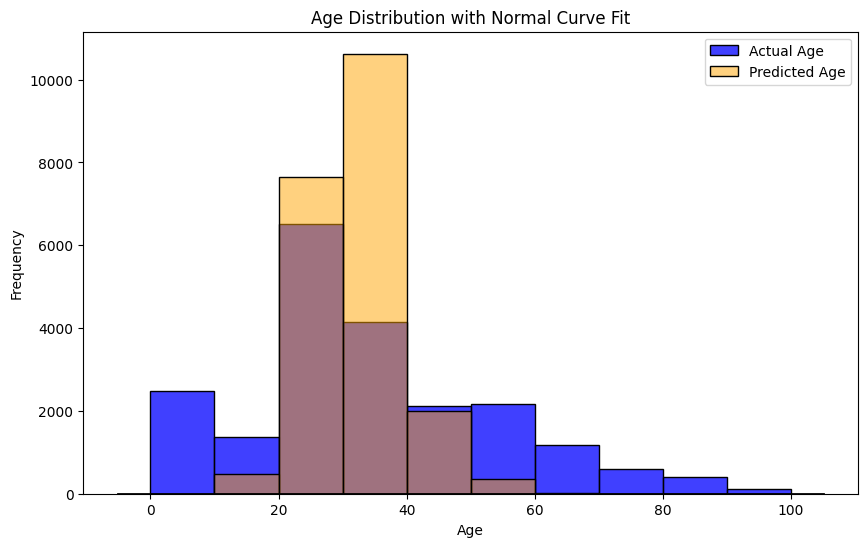

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Assuming the files are in the current working directory
actual_df = pd.read_csv('actual_data.csv')
predicted_df = pd.read_csv('predicted_data.csv')

# Define age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# Create age groups for actual ages
actual_df['AgeGroup'] = pd.cut(actual_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Plotting the distribution of actual ages
plt.figure(figsize=(10, 6))
sns.histplot(actual_df['Age'], kde=False, bins=age_bins, color='blue', label='Actual Age')

# Overlay the predicted ages
sns.histplot(predicted_df['Age'], kde=False, bins=age_bins, color='orange', label='Predicted Age', alpha=0.5)

# Fit and plot a normal distribution for actual ages
mu, std = norm.fit(actual_df['Age'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Title and labels
plt.title('Age Distribution with Normal Curve Fit')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [4]:
# Total number of entries in the actual data
total_entries = len(actual_df)

# Calculate the accuracies
age_accuracy = (matching_age_count / total_entries) * 100
gender_accuracy = (matching_gender_count / total_entries) * 100
race_accuracy = (matching_race_count / total_entries) * 100

print(f'Accuracy for Age: {age_accuracy:.2f}%')
print(f'Accuracy for Gender: {gender_accuracy:.2f}%')
print(f'Accuracy for Race: {race_accuracy:.2f}%')


Accuracy for Age: 3.29%
Accuracy for Gender: 77.38%
Accuracy for Race: 61.59%


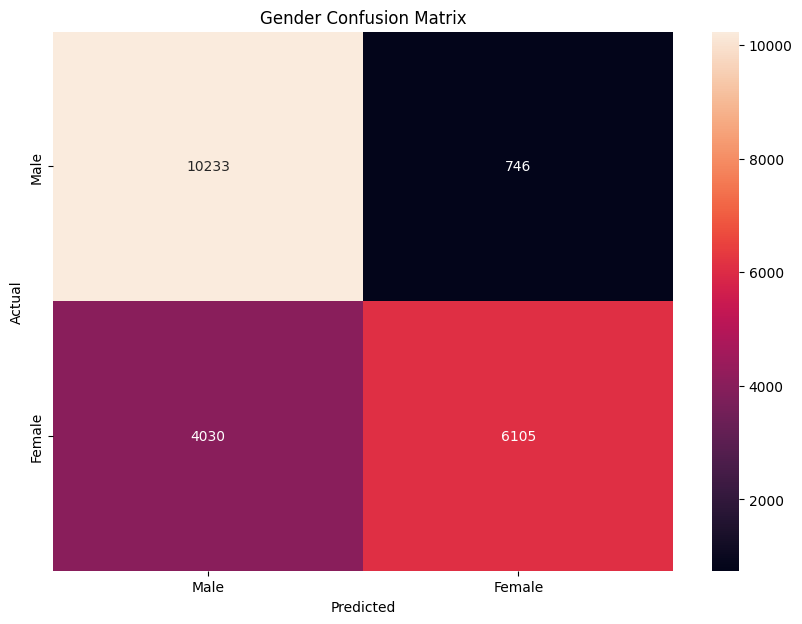

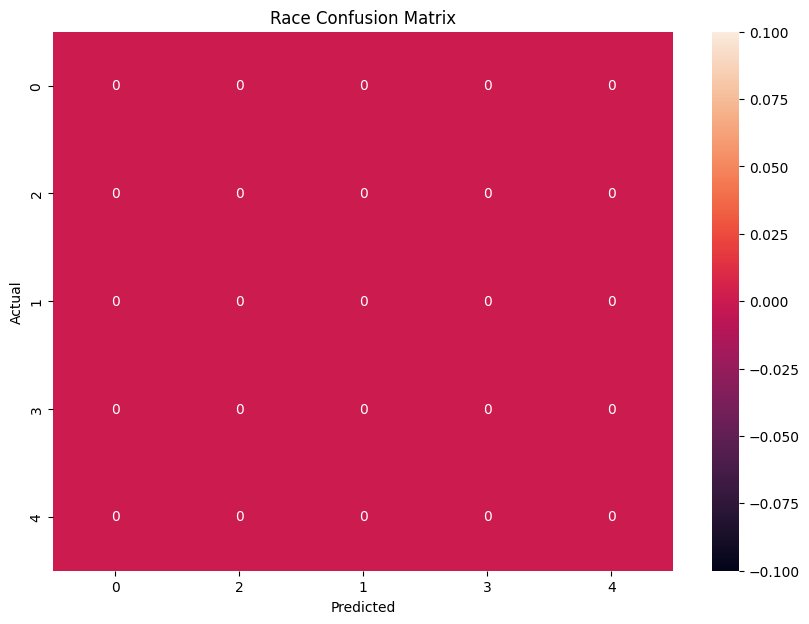

In [118]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
actual_df = pd.read_csv('actual_data.csv')
predicted_df = pd.read_csv('predicted_data.csv')

# Ensure the data is sorted in the same order
actual_df.sort_values(by='Filename', inplace=True)
predicted_df.sort_values(by='Filename', inplace=True)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Confusion Matrix for Gender
gender_labels = ['Male', 'Female']
gender_cm = confusion_matrix(actual_df['Gender'], predicted_df['Gender'])
plot_confusion_matrix(gender_cm, 'Gender Confusion Matrix', gender_labels)

# Confusion Matrix for Race
race_labels = actual_df['Race'].unique().tolist()
race_cm = confusion_matrix(actual_df['Race'], predicted_df['Race'], labels=race_labels)
plot_confusion_matrix(race_cm, 'Race Confusion Matrix', race_labels)


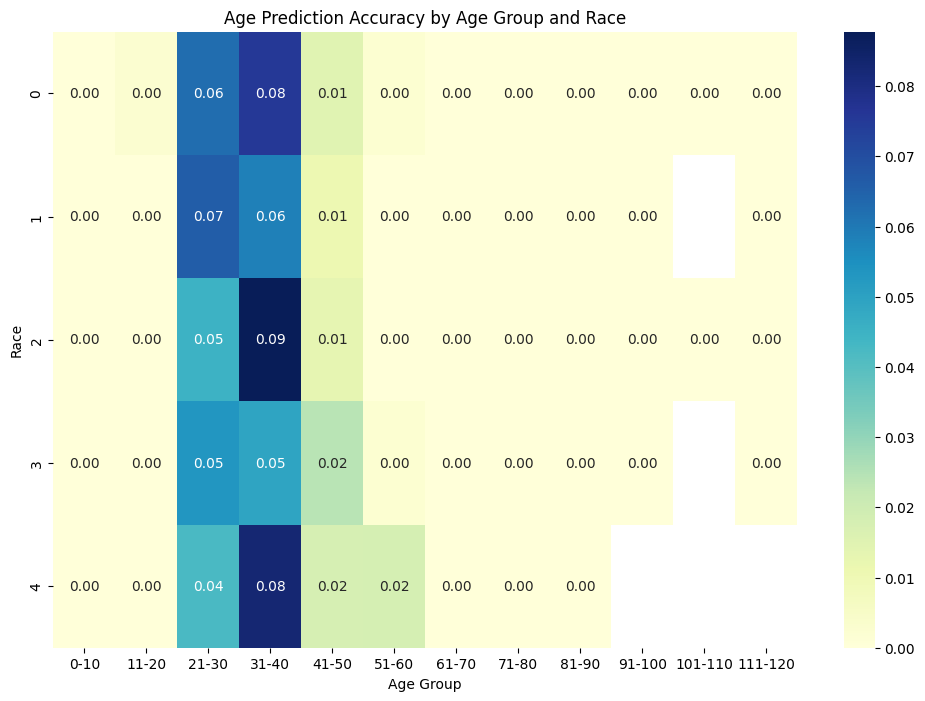

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
actual_df = pd.read_csv('actual_data.csv')  # Use 'actual_data.csv' here
predicted_df = pd.read_csv('predicted_data.csv')

# Define age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110', '111-120']
actual_df['AgeGroup'] = pd.cut(actual_df['Age'], bins=bins, labels=labels, right=False)

# Merge datasets for comparison
merged_df = pd.merge(actual_df, predicted_df, on='Filename', suffixes=('_actual', '_predicted'))

# Group by AgeGroup and Race, then calculate accuracy
grouped = merged_df.groupby(['AgeGroup', 'Race_actual'])
accuracy_df = grouped.apply(lambda x: (x['Age_actual'] == x['Age_predicted']).sum() / len(x)).reset_index()
accuracy_df.columns = ['AgeGroup', 'Race', 'Accuracy']

# Pivot table for heatmap
pivot_table = accuracy_df.pivot(index='Race', columns='AgeGroup', values='Accuracy')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Age Prediction Accuracy by Age Group and Race')
plt.xlabel('Age Group')
plt.ylabel('Race')
plt.show()




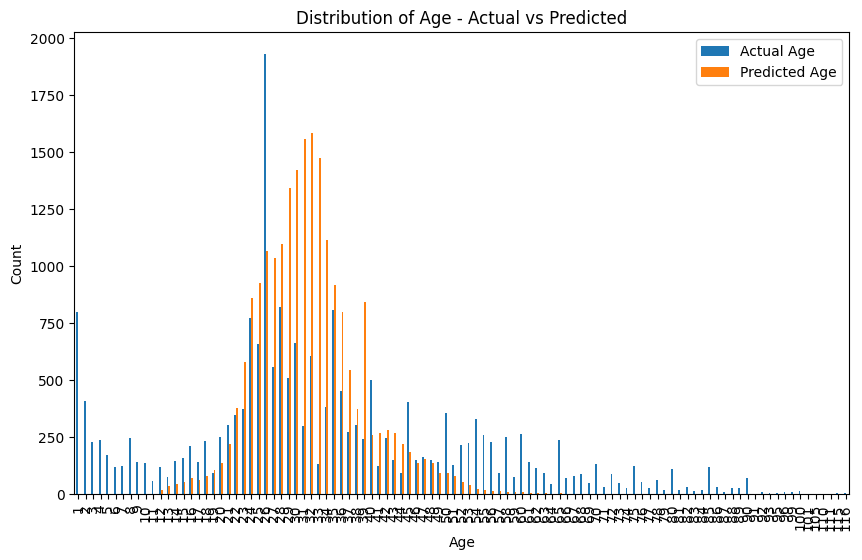

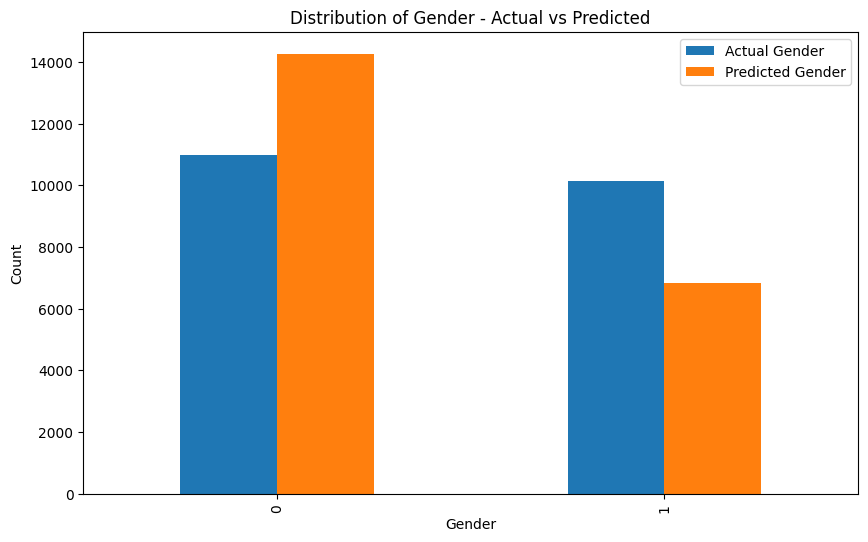

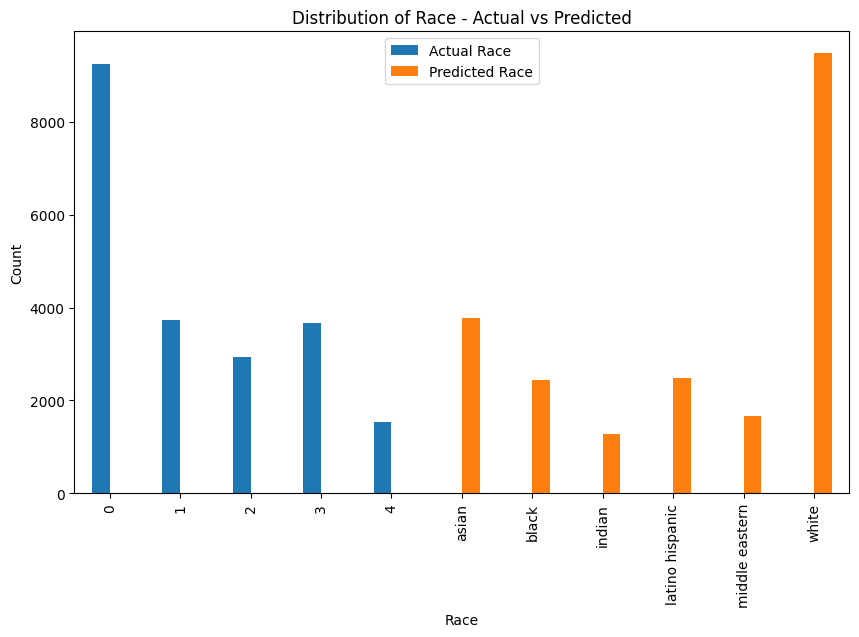

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
actual_df = pd.read_csv('actual_data.csv')
predicted_df = pd.read_csv('predicted_data.csv')

# Convert the 'Race' column to string type for consistent formatting
actual_df['Race'] = actual_df['Race'].astype(str)
predicted_df['Race'] = predicted_df['Race'].astype(str)

# Define a function for plotting bar graphs
def plot_bar_graphs(category):
    actual_counts = actual_df[category].value_counts().sort_index()
    predicted_counts = predicted_df[category].value_counts().sort_index()

    df = pd.DataFrame({f'Actual {category}': actual_counts,
                       f'Predicted {category}': predicted_counts})
    
    df.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Distribution of {category} - Actual vs Predicted')
    plt.xlabel(category)
    plt.ylabel('Count')
    plt.show()

# Plot bar graphs for age, gender, and race
plot_bar_graphs('Age')
plot_bar_graphs('Gender')
plot_bar_graphs('Race')

